In [8]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
import random

def get_data(x0):
    r = 3.9
    x = []
    x.append(x0)
    for i in range(1,1100):
        x1=x0*r*(1-x0)
        x0=x1
        x.append(x1)
    x=np.asarray(x)
    return(x)

menor = np.loadtxt("esn_new_minstable_r3.9_x0.1_d1000.csv", delimiter=",")
list_of_x0 = np.loadtxt("esn_random_x0.1_r3.9.csv", delimiter=" ")

print(menor.shape)

(955, 4)


In [9]:
def get_array(erro_list):
    erro_array = np.asarray(erro_list).reshape(int(len(erro_list)/5),5)
    return erro_array

def get_array2(erro_list):
    erro_array = np.asarray(erro_list).reshape(int(len(erro_list)),10)
    return erro_array

def get_errors(e0,e1,e2,e3,e4,e5,e6,e7,e8,e9):
    
    mae=[np.sum(np.abs(e0),axis=0)[2]/e0.shape[0],np.sum(np.abs(e1),axis=0)[2]/e1.shape[0],np.sum(np.abs(e2),axis=0)[2]/e2.shape[0],
       np.sum(np.abs(e3),axis=0)[2]/e3.shape[0],np.sum(np.abs(e4),axis=0)[2]/e4.shape[0],np.sum(np.abs(e5),axis=0)[2]/e5.shape[0],
       np.sum(np.abs(e6),axis=0)[2]/e6.shape[0],np.sum(np.abs(e7,),axis=0)[2]/e7.shape[0],np.sum(np.abs(e8),axis=0)[2]/e8.shape[0],
       np.sum(np.abs(e9),axis=0)[2]/e9.shape[0]]
    
    mse=[np.sum(e0**2,axis=0)[2]/e0.shape[0],np.sum(e1**2,axis=0)[2]/e1.shape[0],np.sum(e2**2,axis=0)[2]/e2.shape[0],
       np.sum(e3**2,axis=0)[2]/e3.shape[0],np.sum(e4**2,axis=0)[2]/e4.shape[0],np.sum(e5**2,axis=0)[2]/e5.shape[0],
       np.sum(e6**2,axis=0)[2]/e6.shape[0],np.sum(e7**2,axis=0)[2]/e7.shape[0],np.sum(e8**2,axis=0)[2]/e8.shape[0],
       np.sum(e9**2,axis=0)[2]/e9.shape[0]]

    rmse=[np.sqrt(np.sum(e0**2,axis=0)[2]/e0.shape[0]),np.sqrt(np.sum(e1**2,axis=0)[2]/e1.shape[0]),np.sqrt(np.sum(e2**2,axis=0)[2]/e2.shape[0]),
       np.sqrt(np.sum(e3**2,axis=0)[2]/e3.shape[0]),np.sqrt(np.sum(e4**2,axis=0)[2]/e4.shape[0]),np.sqrt(np.sum(e5**2,axis=0)[2]/e5.shape[0]),
       np.sqrt(np.sum(e6**2,axis=0)[2]/e6.shape[0]),np.sqrt(np.sum(e7**2,axis=0)[2]/e7.shape[0]),np.sqrt(np.sum(e8**2,axis=0)[2]/e8.shape[0]),
       np.sqrt(np.sum(e9**2,axis=0)[2]/e9.shape[0])]
    
    return mae,mse,rmse
    

In [10]:
erro_bl0 = []
erro_bl1 = []
erro_bl2 = []
erro_bl3 = []
erro_bl4 = []
erro_bl5 = []
erro_bl6 = []
erro_bl7 = []
erro_bl8 = []
erro_bl9 = []

erro2d_bl0 = []
erro2d_bl1 = []
erro2d_bl2 = []
erro2d_bl3 = []
erro2d_bl4 = []
erro2d_bl5 = []
erro2d_bl6 = []
erro2d_bl7 = []
erro2d_bl8 = []
erro2d_bl9 = []

erro3d_bl0 = []
erro3d_bl1 = []
erro3d_bl2 = []
erro3d_bl3 = []
erro3d_bl4 = []
erro3d_bl5 = []
erro3d_bl6 = []
erro3d_bl7 = []
erro3d_bl8 = []
erro3d_bl9 = []

erro4d_bl0 = []
erro4d_bl1 = []
erro4d_bl2 = []
erro4d_bl3 = []
erro4d_bl4 = []
erro4d_bl5 = []
erro4d_bl6 = []
erro4d_bl7 = []
erro4d_bl8 = []
erro4d_bl9 = []

MAE = []
MSE = []
RMSE = []
MAE2D = []
MSE2D = []
RMSE2D = []
MAE3D = []
MSE3D = []
RMSE3D = []
MAE4D = []
MSE4D = []
RMSE4D = []


for i in range(menor.shape[0]):
    data = get_data(list_of_x0[i])
    
    esn = ESN(n_inputs = 1,
        n_outputs = 1,
      n_reservoir = int(menor[i][1]),
      spectral_radius = menor[i][2],
      random_state=42)
    trainlen = 1000
    future = 10
    pred_training = esn.fit(np.ones(trainlen),data[0:trainlen])

    prediction = esn.predict(np.ones(future))
    error = np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))
    print(i,'test error:',error)
   
    
    
    cont = np.zeros((10))
    for ii in range(future):
        
        if data[trainlen+ii] < 0.1:
            erro_bl0.append(prediction[ii][0])
            erro_bl0.append(data[trainlen+ii])
            erro_bl0.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl0.append(i)
            erro_bl0.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl0.append(prediction[ii][0])
                erro2d_bl0.append(data[trainlen+ii])
                erro2d_bl0.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl0.append(i)
                erro2d_bl0.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl0.append(prediction[ii][0])
                erro3d_bl0.append(data[trainlen+ii])
                erro3d_bl0.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl0.append(i)
                erro3d_bl0.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl0.append(prediction[ii][0])
                erro4d_bl0.append(data[trainlen+ii])
                erro4d_bl0.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl0.append(i)
                erro4d_bl0.append(ii)
            cont[0]+=1
        elif data[trainlen+ii] < 0.2:
            erro_bl1.append(prediction[ii][0])
            erro_bl1.append(data[trainlen+ii])
            erro_bl1.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl1.append(i)
            erro_bl1.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl1.append(prediction[ii][0])
                erro2d_bl1.append(data[trainlen+ii])
                erro2d_bl1.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl1.append(i)
                erro2d_bl1.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl1.append(prediction[ii][0])
                erro3d_bl1.append(data[trainlen+ii])
                erro3d_bl1.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl1.append(i)
                erro3d_bl1.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl1.append(prediction[ii][0])
                erro4d_bl1.append(data[trainlen+ii])
                erro4d_bl1.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl1.append(i)
                erro4d_bl1.append(ii)
            cont[1]+=1
        elif data[trainlen+ii] < 0.3:
            erro_bl2.append(prediction[ii][0])
            erro_bl2.append(data[trainlen+ii])
            erro_bl2.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl2.append(i)
            erro_bl2.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl2.append(prediction[ii][0])
                erro2d_bl2.append(data[trainlen+ii])
                erro2d_bl2.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl2.append(i)
                erro2d_bl2.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl2.append(prediction[ii][0])
                erro3d_bl2.append(data[trainlen+ii])
                erro3d_bl2.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl2.append(i)
                erro3d_bl2.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl2.append(prediction[ii][0])
                erro4d_bl2.append(data[trainlen+ii])
                erro4d_bl2.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl2.append(i)
                erro4d_bl2.append(ii)
            cont[2]+=1
        elif data[trainlen+ii] < 0.4:
            erro_bl3.append(prediction[ii][0])
            erro_bl3.append(data[trainlen+ii])
            erro_bl3.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl3.append(i)
            erro_bl3.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl3.append(prediction[ii][0])
                erro2d_bl3.append(data[trainlen+ii])
                erro2d_bl3.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl3.append(i)
                erro2d_bl3.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl3.append(prediction[ii][0])
                erro3d_bl3.append(data[trainlen+ii])
                erro3d_bl3.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl3.append(i)
                erro3d_bl3.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl3.append(prediction[ii][0])
                erro4d_bl3.append(data[trainlen+ii])
                erro4d_bl3.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl3.append(i)
                erro4d_bl3.append(ii)
            cont[3]+=1
        elif data[trainlen+ii] < 0.5:
            erro_bl4.append(prediction[ii][0])
            erro_bl4.append(data[trainlen+ii])
            erro_bl4.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl4.append(i)
            erro_bl4.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl4.append(prediction[ii][0])
                erro2d_bl4.append(data[trainlen+ii])
                erro2d_bl4.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl4.append(i)
                erro2d_bl4.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl4.append(prediction[ii][0])
                erro3d_bl4.append(data[trainlen+ii])
                erro3d_bl4.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl4.append(i)
                erro3d_bl4.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl4.append(prediction[ii][0])
                erro4d_bl4.append(data[trainlen+ii])
                erro4d_bl4.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl4.append(i)
                erro4d_bl4.append(ii)
            cont[4]+=1
        elif data[trainlen+ii] < 0.6:
            erro_bl5.append(prediction[ii][0])
            erro_bl5.append(data[trainlen+ii])
            erro_bl5.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl5.append(i)
            erro_bl5.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl5.append(prediction[ii][0])
                erro2d_bl5.append(data[trainlen+ii])
                erro2d_bl5.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl5.append(i)
                erro2d_bl5.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl5.append(prediction[ii][0])
                erro3d_bl5.append(data[trainlen+ii])
                erro3d_bl5.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl5.append(i)
                erro3d_bl5.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl5.append(prediction[ii][0])
                erro4d_bl5.append(data[trainlen+ii])
                erro4d_bl5.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl5.append(i)
                erro4d_bl5.append(ii)
            cont[5]+=1
        elif data[trainlen+ii] < 0.7:
            erro_bl6.append(prediction[ii][0])
            erro_bl6.append(data[trainlen+ii])
            erro_bl6.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl6.append(i)
            erro_bl6.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl6.append(prediction[ii][0])
                erro2d_bl6.append(data[trainlen+ii])
                erro2d_bl6.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl6.append(i)
                erro2d_bl6.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl6.append(prediction[ii][0])
                erro3d_bl6.append(data[trainlen+ii])
                erro3d_bl6.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl6.append(i)
                erro3d_bl6.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl6.append(prediction[ii][0])
                erro4d_bl6.append(data[trainlen+ii])
                erro4d_bl6.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl6.append(i)
                erro4d_bl6.append(ii)
            cont[6]+=1
        elif data[trainlen+ii] < 0.8:
            erro_bl7.append(prediction[ii][0])
            erro_bl7.append(data[trainlen+ii])
            erro_bl7.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl7.append(i)
            erro_bl7.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl7.append(prediction[ii][0])
                erro2d_bl7.append(data[trainlen+ii])
                erro2d_bl7.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl7.append(i)
                erro2d_bl7.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl7.append(prediction[ii][0])
                erro3d_bl7.append(data[trainlen+ii])
                erro3d_bl7.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl7.append(i)
                erro3d_bl7.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl7.append(prediction[ii][0])
                erro4d_bl7.append(data[trainlen+ii])
                erro4d_bl7.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl7.append(i)
                erro4d_bl7.append(ii)
            cont[7]+=1
        elif data[trainlen+ii] < 0.9:
            erro_bl8.append(prediction[ii][0])
            erro_bl8.append(data[trainlen+ii])
            erro_bl8.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl8.append(i)
            erro_bl8.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl8.append(prediction[ii][0])
                erro2d_bl8.append(data[trainlen+ii])
                erro2d_bl8.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl8.append(i)
                erro2d_bl8.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl8.append(prediction[ii][0])
                erro3d_bl8.append(data[trainlen+ii])
                erro3d_bl8.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl8.append(i)
                erro3d_bl8.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl8.append(prediction[ii][0])
                erro4d_bl8.append(data[trainlen+ii])
                erro4d_bl8.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl8.append(i)
                erro4d_bl8.append(ii)
            cont[8]+=1
        else:
            erro_bl9.append(prediction[ii][0])
            erro_bl9.append(data[trainlen+ii])
            erro_bl9.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl9.append(i)
            erro_bl9.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl9.append(prediction[ii][0])
                erro2d_bl9.append(data[trainlen+ii])
                erro2d_bl9.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl9.append(i)
                erro2d_bl9.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl9.append(prediction[ii][0])
                erro3d_bl9.append(data[trainlen+ii])
                erro3d_bl9.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl9.append(i)
                erro3d_bl9.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl9.append(prediction[ii][0])
                erro4d_bl9.append(data[trainlen+ii])
                erro4d_bl9.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl9.append(i)
                erro4d_bl9.append(ii)
            cont[9]+=1
    
    mae,mse,rmse = get_errors(get_array(erro_bl0),get_array(erro_bl1),get_array(erro_bl2),get_array(erro_bl3),get_array(erro_bl4),get_array(erro_bl5),get_array(erro_bl6),get_array(erro_bl7),get_array(erro_bl8),get_array(erro_bl9))
    mae2d,mse2d,rmse2d = get_errors(get_array(erro2d_bl0),get_array(erro2d_bl1),get_array(erro2d_bl2),get_array(erro2d_bl3),get_array(erro2d_bl4),get_array(erro2d_bl5),get_array(erro2d_bl6),get_array(erro2d_bl7),get_array(erro2d_bl8),get_array(erro2d_bl9)) 
    mae3d,mse3d,rmse3d = get_errors(get_array(erro3d_bl0),get_array(erro3d_bl1),get_array(erro3d_bl2),get_array(erro3d_bl3),get_array(erro3d_bl4),get_array(erro3d_bl5),get_array(erro3d_bl6),get_array(erro3d_bl7),get_array(erro3d_bl8),get_array(erro3d_bl9))  
    mae4d,mse4d,rmse4d = get_errors(get_array(erro4d_bl0),get_array(erro4d_bl1),get_array(erro4d_bl2),get_array(erro4d_bl3),get_array(erro4d_bl4),get_array(erro4d_bl5),get_array(erro4d_bl6),get_array(erro4d_bl7),get_array(erro4d_bl8),get_array(erro4d_bl9)) 
    
    MAE.append(mae)
    MSE.append(mse)
    RMSE.append(rmse)
    MAE2D.append(mae2d)
    MSE2D.append(mse2d)
    RMSE2D.append(rmse2d)
    MAE3D.append(mae3d)
    MSE3D.append(mse3d)
    RMSE3D.append(rmse3d)
    MAE4D.append(mae4d)
    MSE4D.append(mse4d)
    RMSE4D.append(rmse4d)
        
    
    mae_cp,mse_cp,rmse_cp = mae,mse,rmse
    mae2d_cp,mse2d_cp,rmse2d_cp = mae2d,mse2d,rmse2d
    mae3d_cp,mse3d_cp,rmse3d_cp = mae3d,mse3d,rmse3d
    mae4d_cp,mse4d_cp,rmse4d_cp = mae4d,mse4d,rmse4d
    
    
    
    

0 test error: 0.0010520248957893792


/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.p

1 test error: 0.0015023016387901318
2 test error: 0.0008957057062035931
3 test error: 0.001702295396490165
4 test error: 0.002031368524016437
5 test error: 0.0016269529058571513
6 test error: 0.0018778471552664592
7 test error: 0.0013080930662066985
8 test error: 0.0010217514185703847
9 test error: 0.002201721565626184
10 test error: 0.0014381918983634458
11 test error: 0.0022244452816001965
12 test error: 0.0012479333252179336
13 test error: 0.0010073389110055093
14 test error: 0.0015454805235662664
15 test error: 0.001693628893071795
16 test error: 0.002888884212622238
17 test error: 0.0008154646132396485
18 test error: 0.0018221545094328098
19 test error: 0.0005381316757183485
20 test error: 0.001135125877943659
21 test error: 0.0015979093950071574
22 test error: 0.0007237159321841994
23 test error: 0.0013651610884167316
24 test error: 0.0007711219408968703
25 test error: 0.0022360721113909667
26 test error: 0.0009323715542453297
27 test error: 0.0006633365955087691
28 test error: 0

221 test error: 0.0011502143885515526
222 test error: 0.002227063879618863
223 test error: 0.0011294378149620634
224 test error: 0.0029210258337789407
225 test error: 0.0015392627513400882
226 test error: 0.0013459316520404204
227 test error: 0.001977379532513017
228 test error: 0.0008721086760503832
229 test error: 0.003226460968430744
230 test error: 0.0007882483614175932
231 test error: 0.0015326535938314507
232 test error: 0.0014999756598751788
233 test error: 0.0015572694815076732
234 test error: 0.002060663537643824
235 test error: 0.0016047977754487172
236 test error: 0.0008707119447673014
237 test error: 0.0031914544850502142
238 test error: 0.0012365197246205428
239 test error: 0.0008634316992852801
240 test error: 0.001466021188164998
241 test error: 0.0014207201386958789
242 test error: 0.0008894607991173744
243 test error: 0.0015233867969793805
244 test error: 0.0018800419327879112
245 test error: 0.0019639867396803144
246 test error: 0.001492756369049651
247 test error: 0.

439 test error: 0.00100292927936615
440 test error: 0.0009650006815206174
441 test error: 0.001382845669772234
442 test error: 0.0014783907135630062
443 test error: 0.0012849583313361362
444 test error: 0.0014915571488828576
445 test error: 0.0010543247484845837
446 test error: 0.0013738549108417578
447 test error: 0.0010107161395140408
448 test error: 0.001382072517983347
449 test error: 0.0011975862224859618
450 test error: 0.003260246514455459
451 test error: 0.0011387816067386478
452 test error: 0.001039705465639529
453 test error: 0.0026745219323561394
454 test error: 0.0009360631879024833
455 test error: 0.00147220866347889
456 test error: 0.0005565501812364892
457 test error: 0.002495365486658661
458 test error: 0.0019615021286616277
459 test error: 0.0017251006909413977
460 test error: 0.001383097986815704
461 test error: 0.001228085490352324
462 test error: 0.0010191279409504281
463 test error: 0.001422057761349763
464 test error: 0.001265264716878881
465 test error: 0.0018245

657 test error: 0.0006760148687072305
658 test error: 0.0016348123657302673
659 test error: 0.0011283063277891443
660 test error: 0.00300423867123582
661 test error: 0.0011749221322779441
662 test error: 0.0013100100653544915
663 test error: 0.0016660671267052299
664 test error: 0.0018745367484201212
665 test error: 0.0014911589681547207
666 test error: 0.0023033295943680216
667 test error: 0.0013743144465114137
668 test error: 0.0007917065926378424
669 test error: 0.002981583324425597
670 test error: 0.0015678190791507767
671 test error: 0.0012402277230006366
672 test error: 0.0008241832591939052
673 test error: 0.0008392730136416471
674 test error: 0.001265024014469953
675 test error: 0.0023252580776010313
676 test error: 0.0007984743555044772
677 test error: 0.0009411533537094196
678 test error: 0.0011788583234085114
679 test error: 0.0014337223472577396
680 test error: 0.0015617423773404723
681 test error: 0.0008305981342707987
682 test error: 0.0011551258598799762
683 test error: 

875 test error: 0.001776809558360604
876 test error: 0.0014915723840702255
877 test error: 0.0022184058710173985
878 test error: 0.0015026358060134934
879 test error: 0.001047765482015357
880 test error: 0.0021983943394598606
881 test error: 0.0007514556171414235
882 test error: 0.002021660948775386
883 test error: 0.0026950126511971735
884 test error: 0.0006694903267476521
885 test error: 0.002219757825313369
886 test error: 0.0007940064525966881
887 test error: 0.0013665581444415181
888 test error: 0.0010246568923037939
889 test error: 0.0012693886912837269
890 test error: 0.0017286332640095304
891 test error: 0.0012554714947838287
892 test error: 0.0032023282334842
893 test error: 0.001641812879697572
894 test error: 0.001481639284355981
895 test error: 0.0010300500222121321
896 test error: 0.000799946027831984
897 test error: 0.002155261159415089
898 test error: 0.000665947311414334
899 test error: 0.001244336177202554
900 test error: 0.0014920064350875716
901 test error: 0.0007923

In [11]:
MAEc = get_array2(MAE)
MSEc = get_array2(MSE)
RMSEc = get_array2(RMSE)
MAE2Dc = get_array2(MAE2D)
MSE2Dc = get_array2(MSE2D)
RMSE2Dc = get_array2(RMSE2D)
MAE3Dc = get_array2(MAE3D)
MSE3Dc = get_array2(MSE3D)
RMSE3Dc = get_array2(RMSE3D)
MAE4Dc = get_array2(MAE4D)
MSE4Dc = get_array2(MSE4D)
RMSE4Dc = get_array2(RMSE4D)

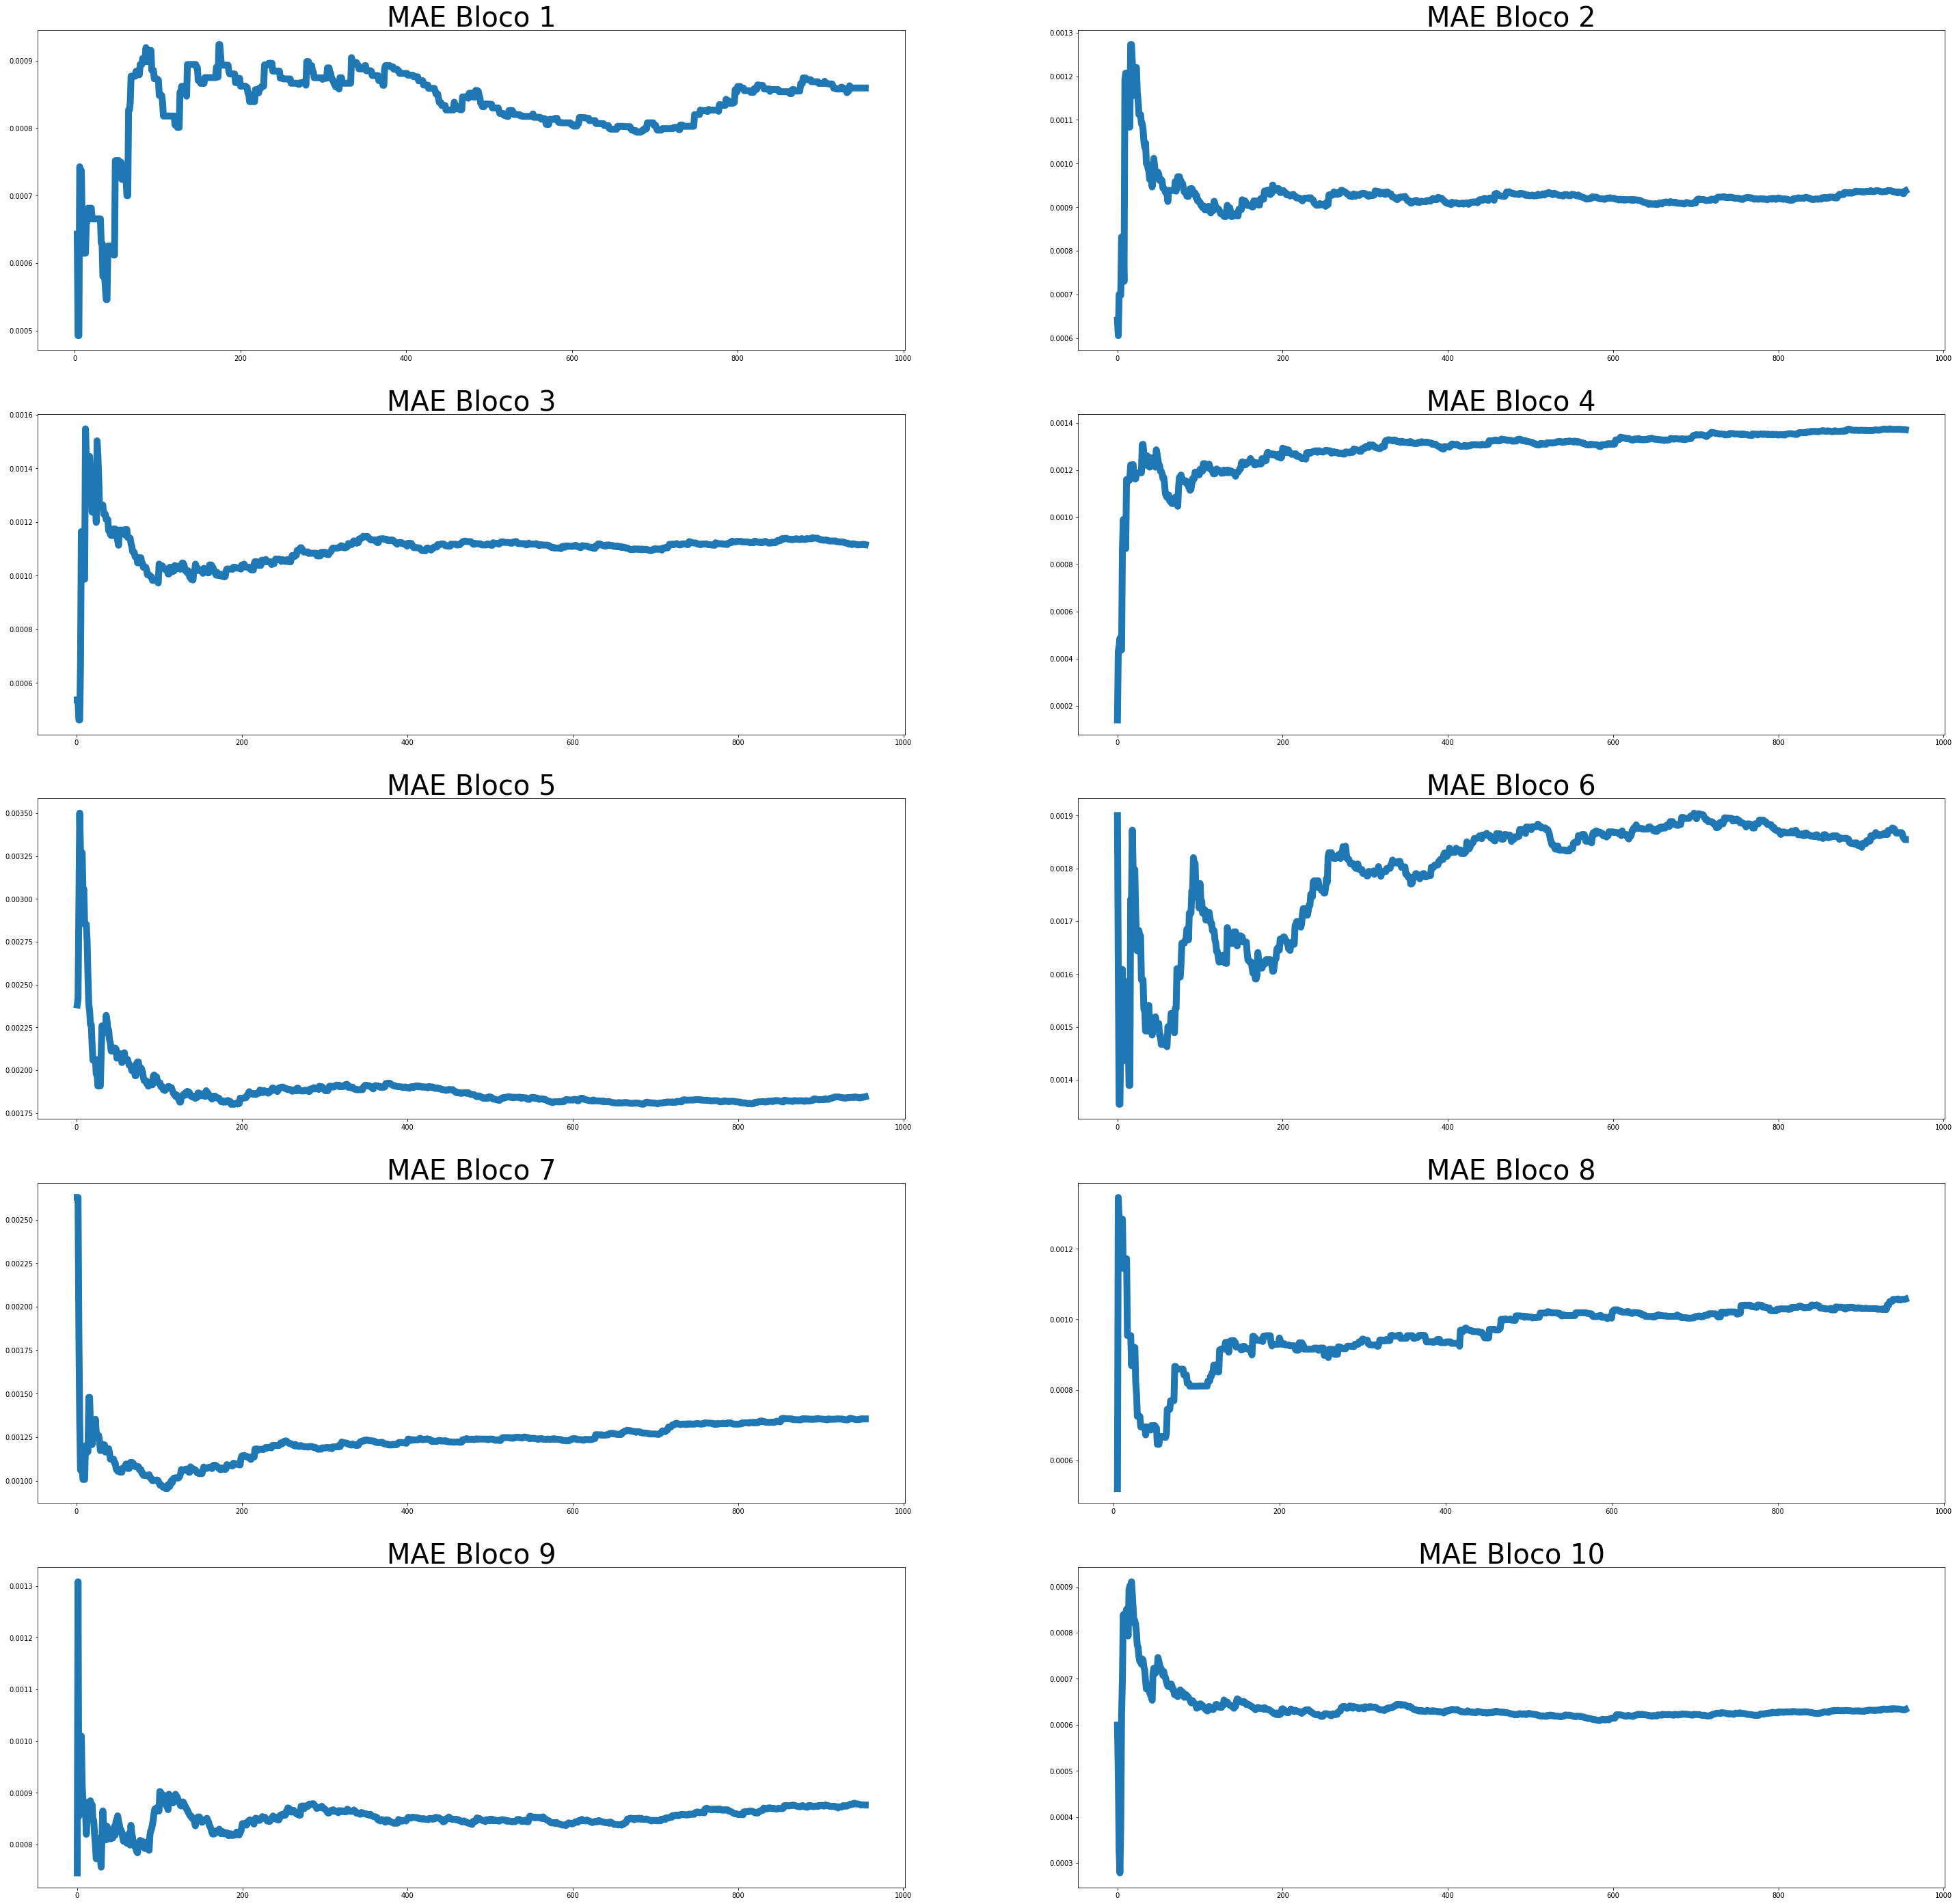

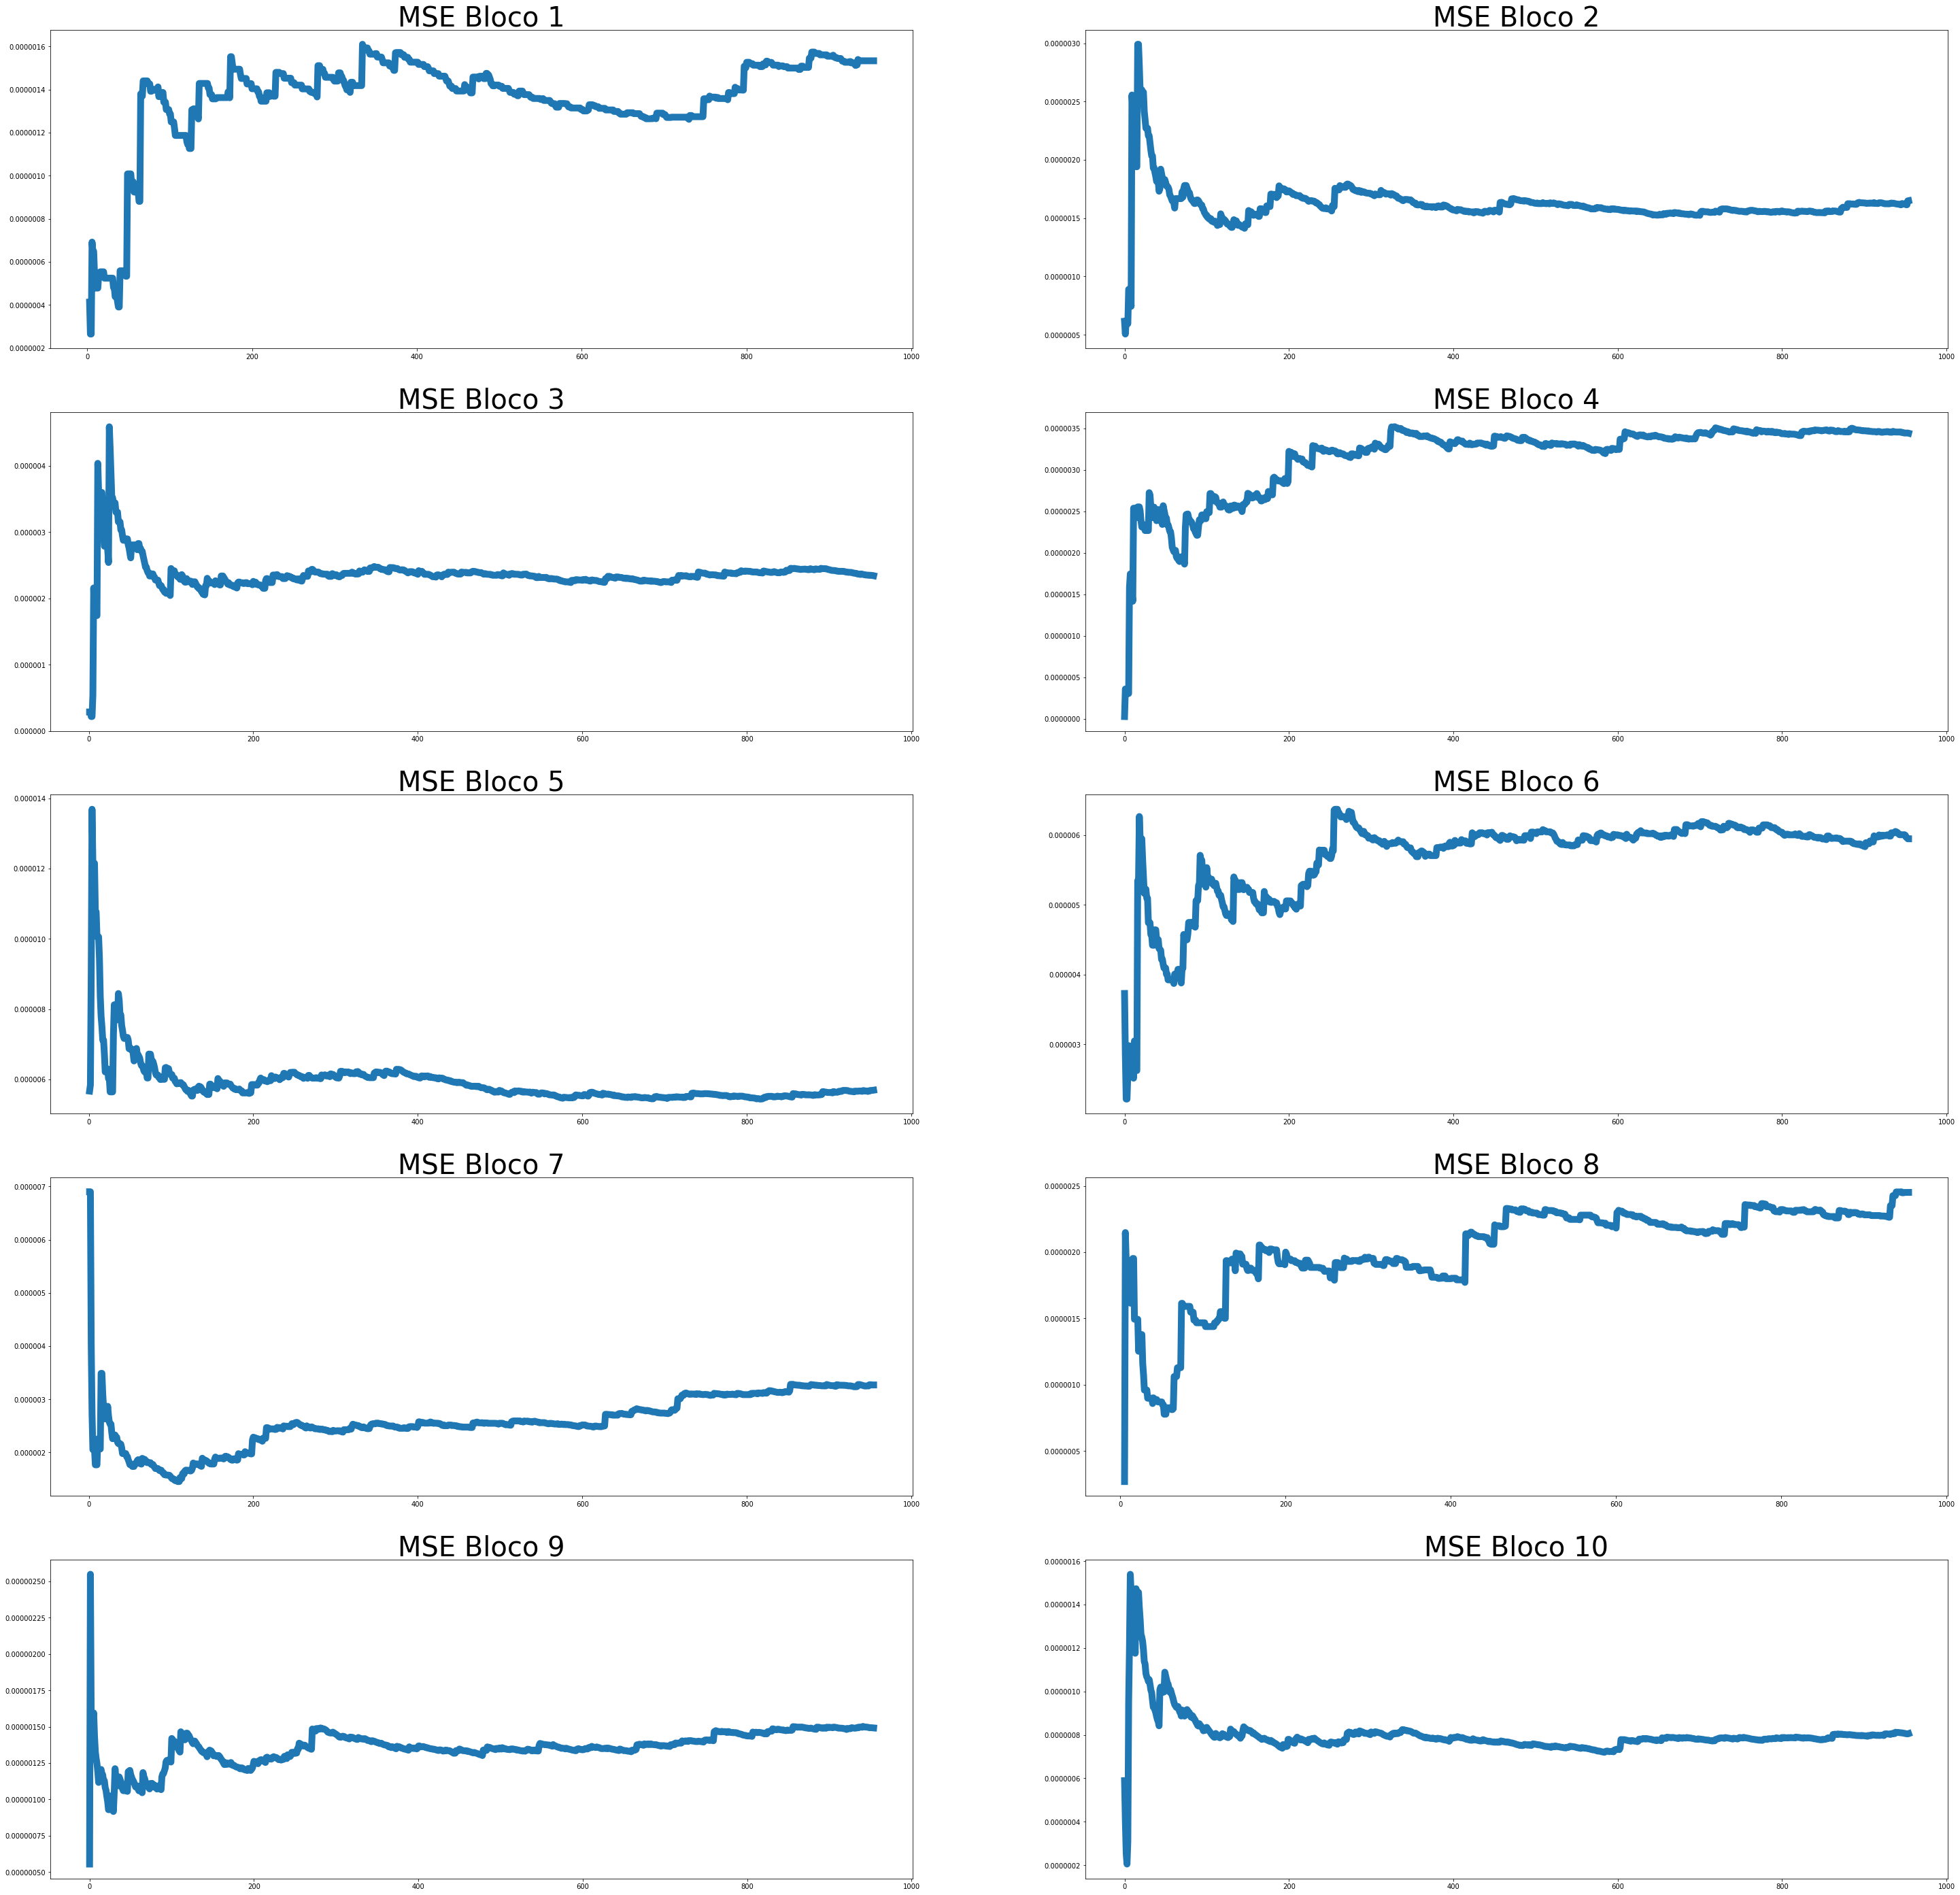

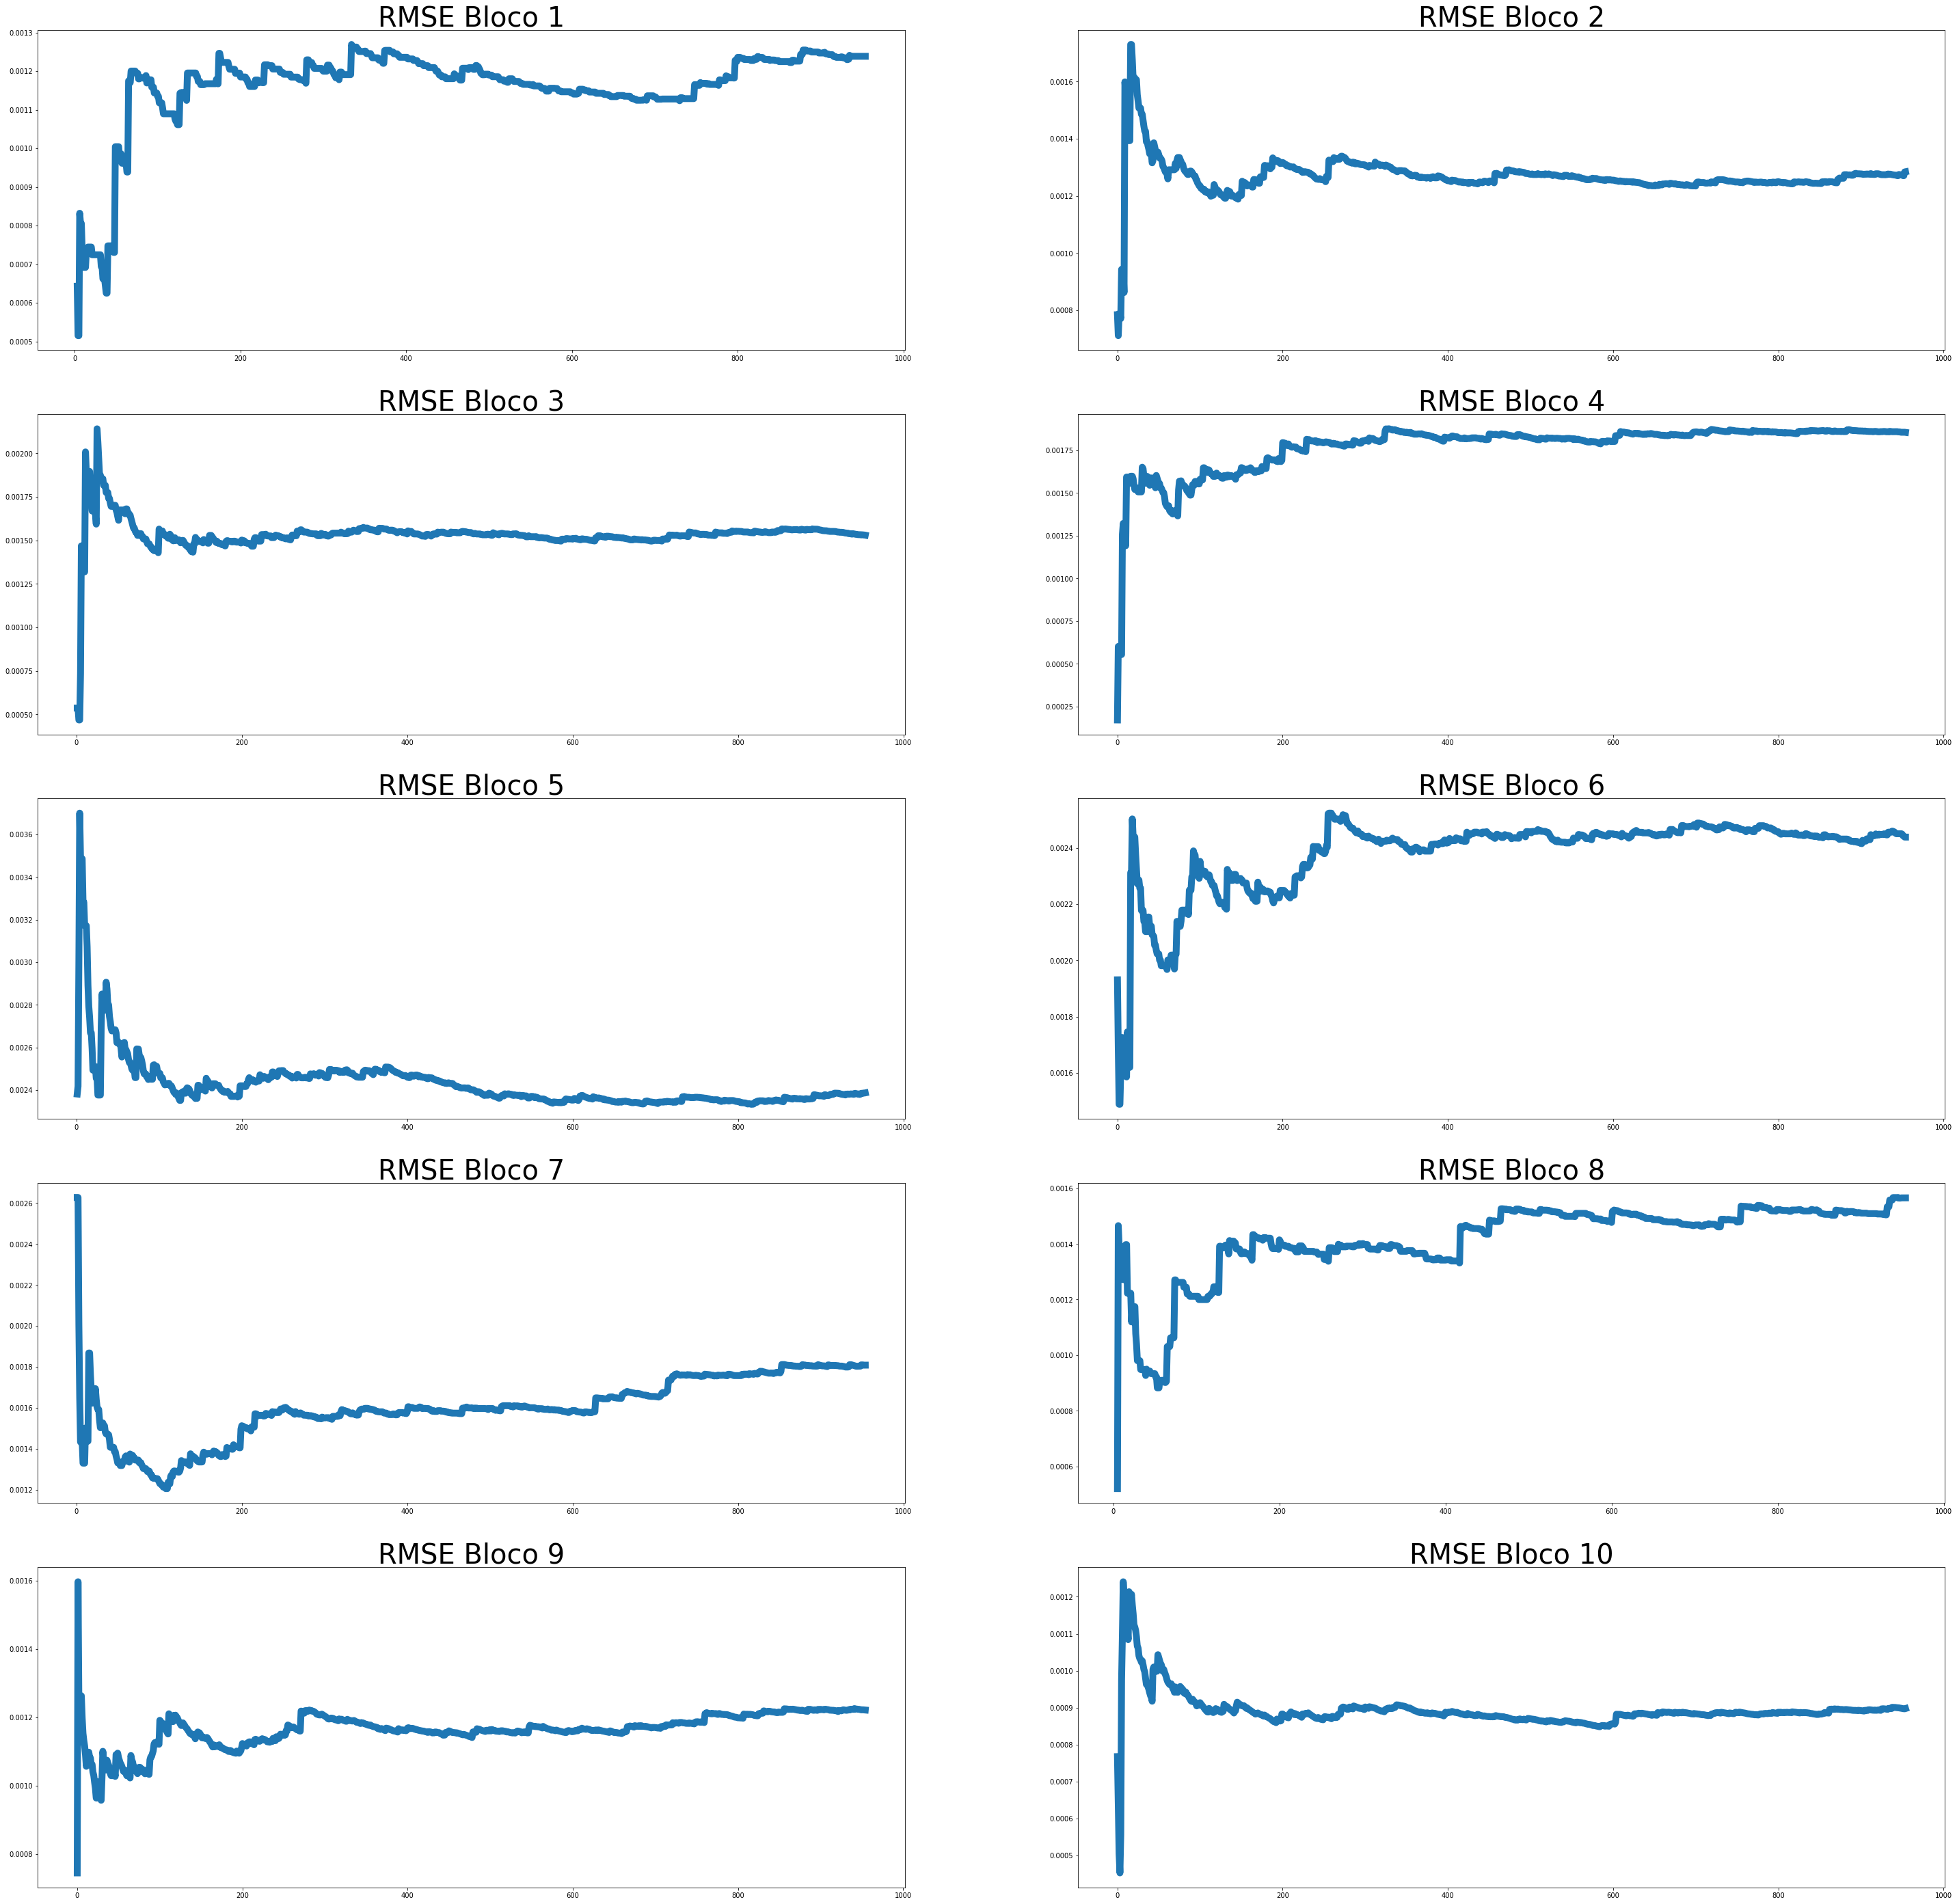

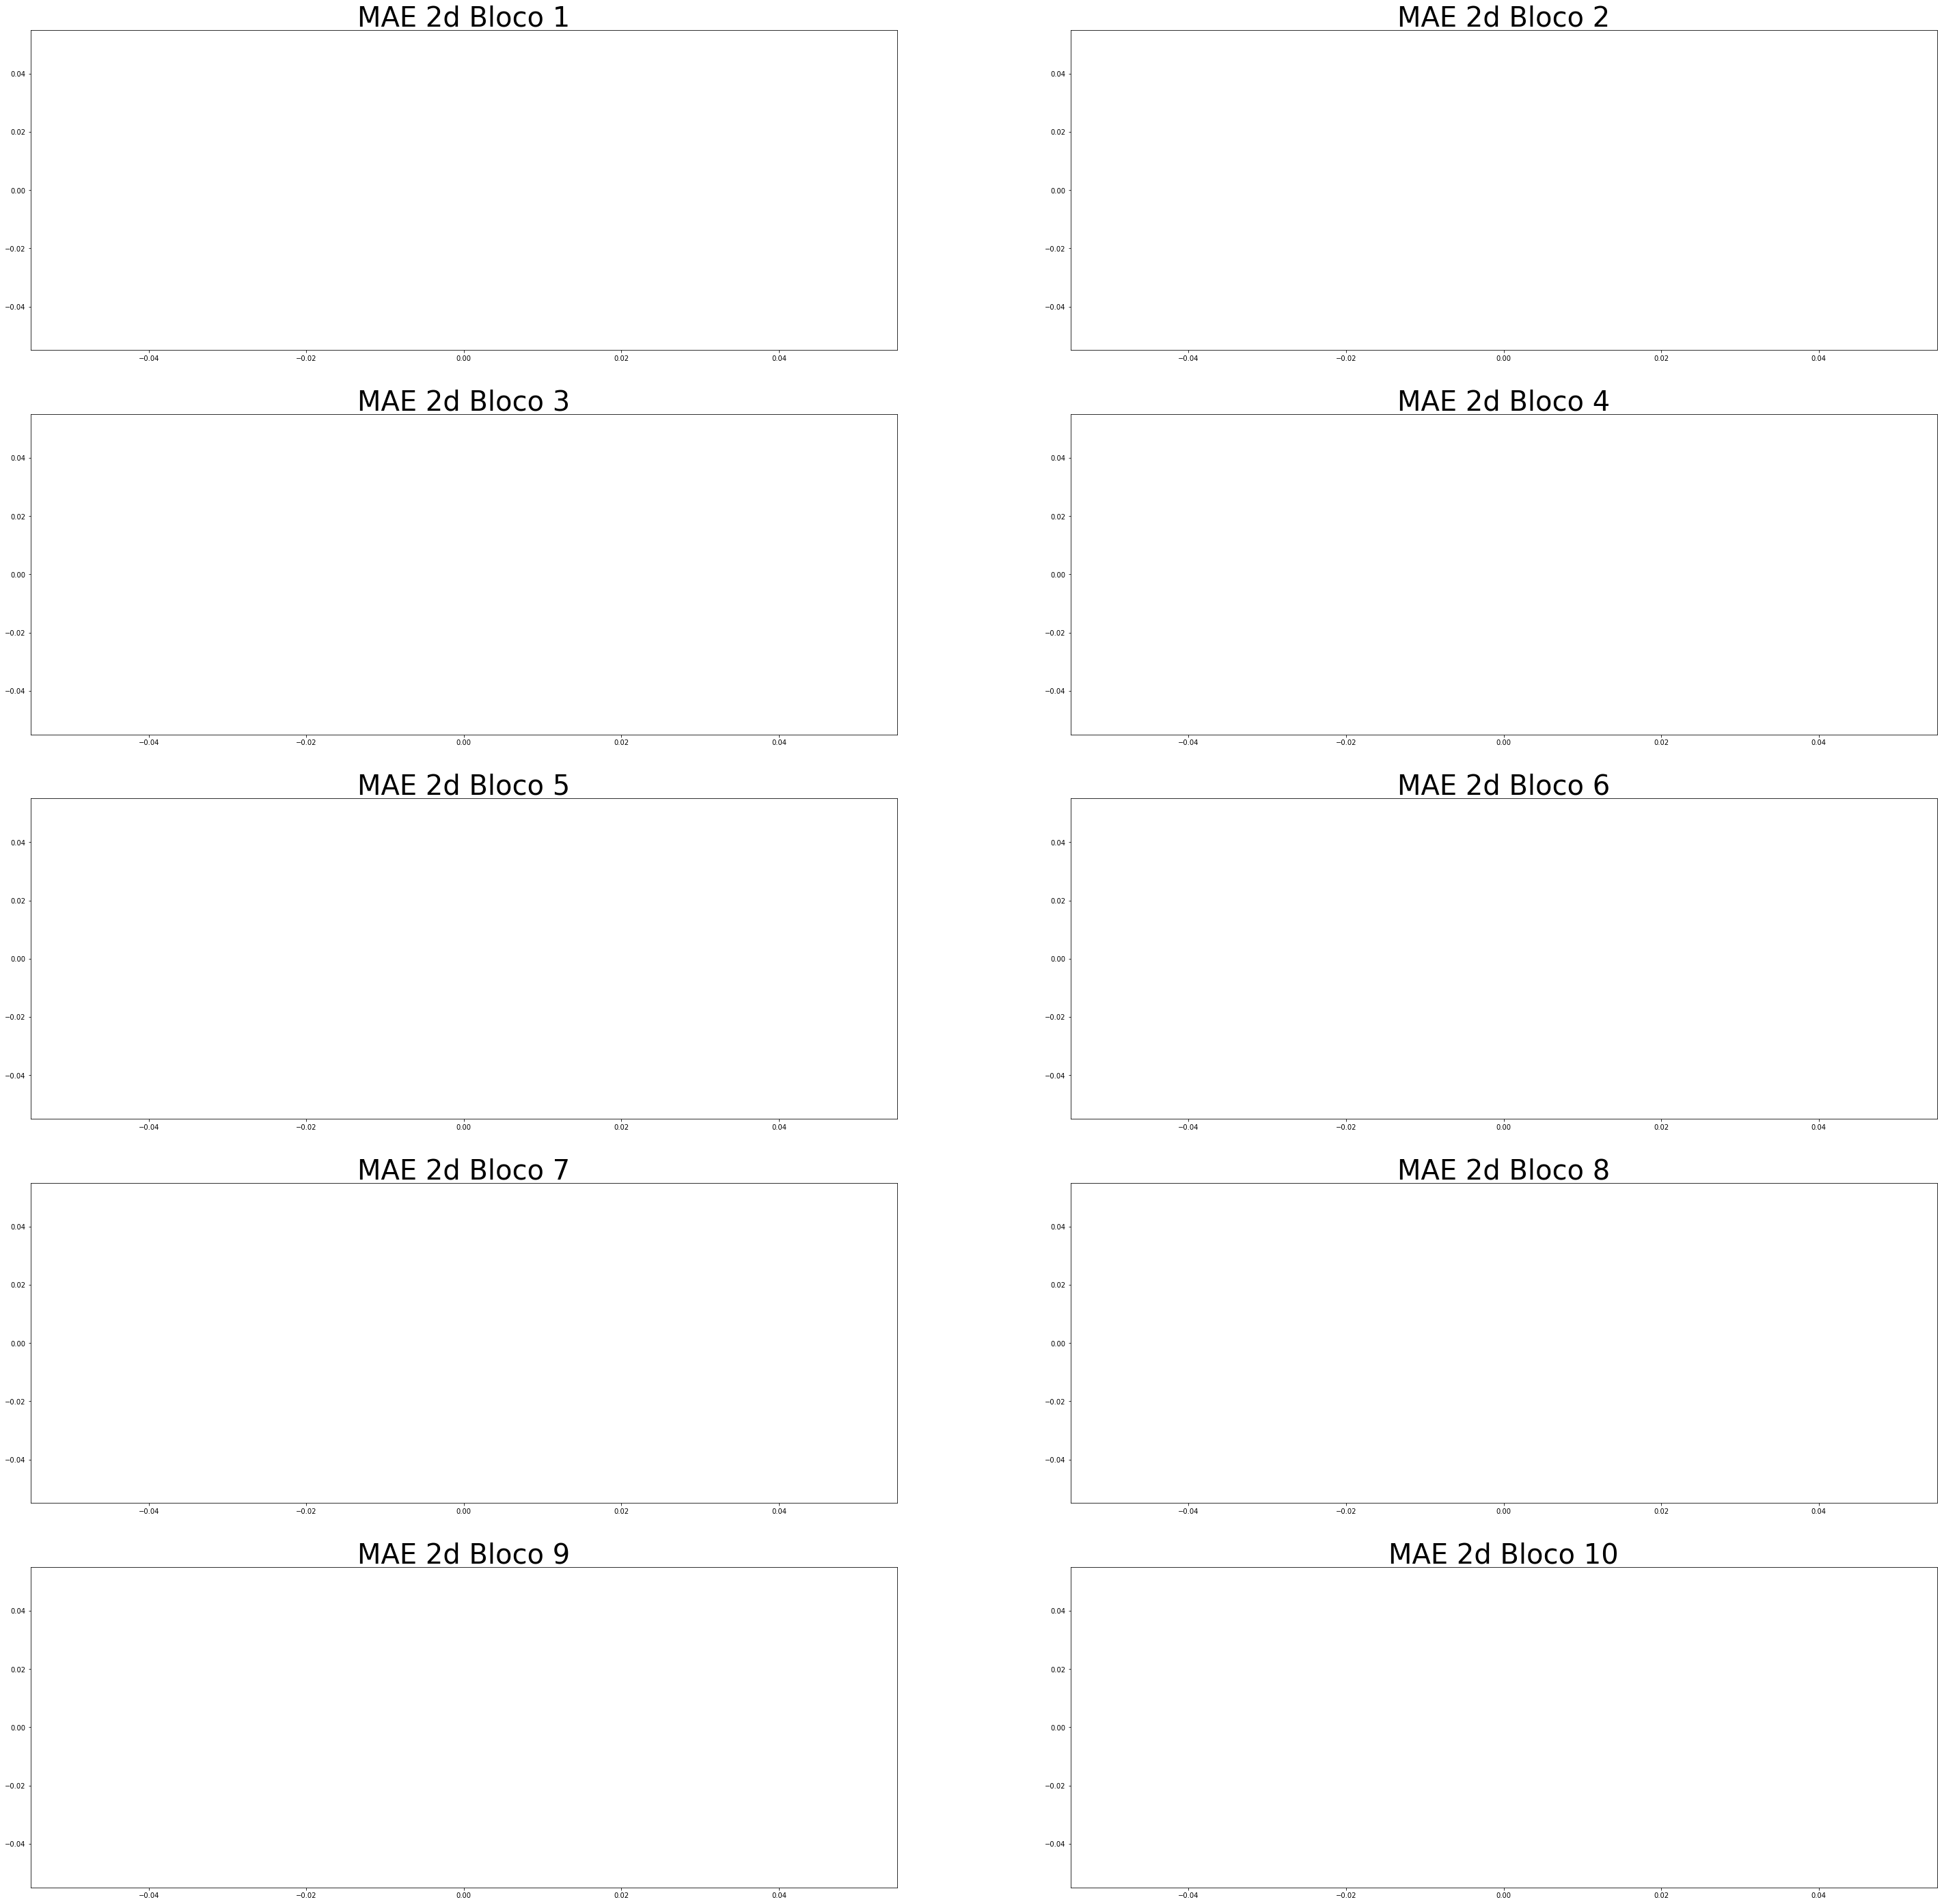

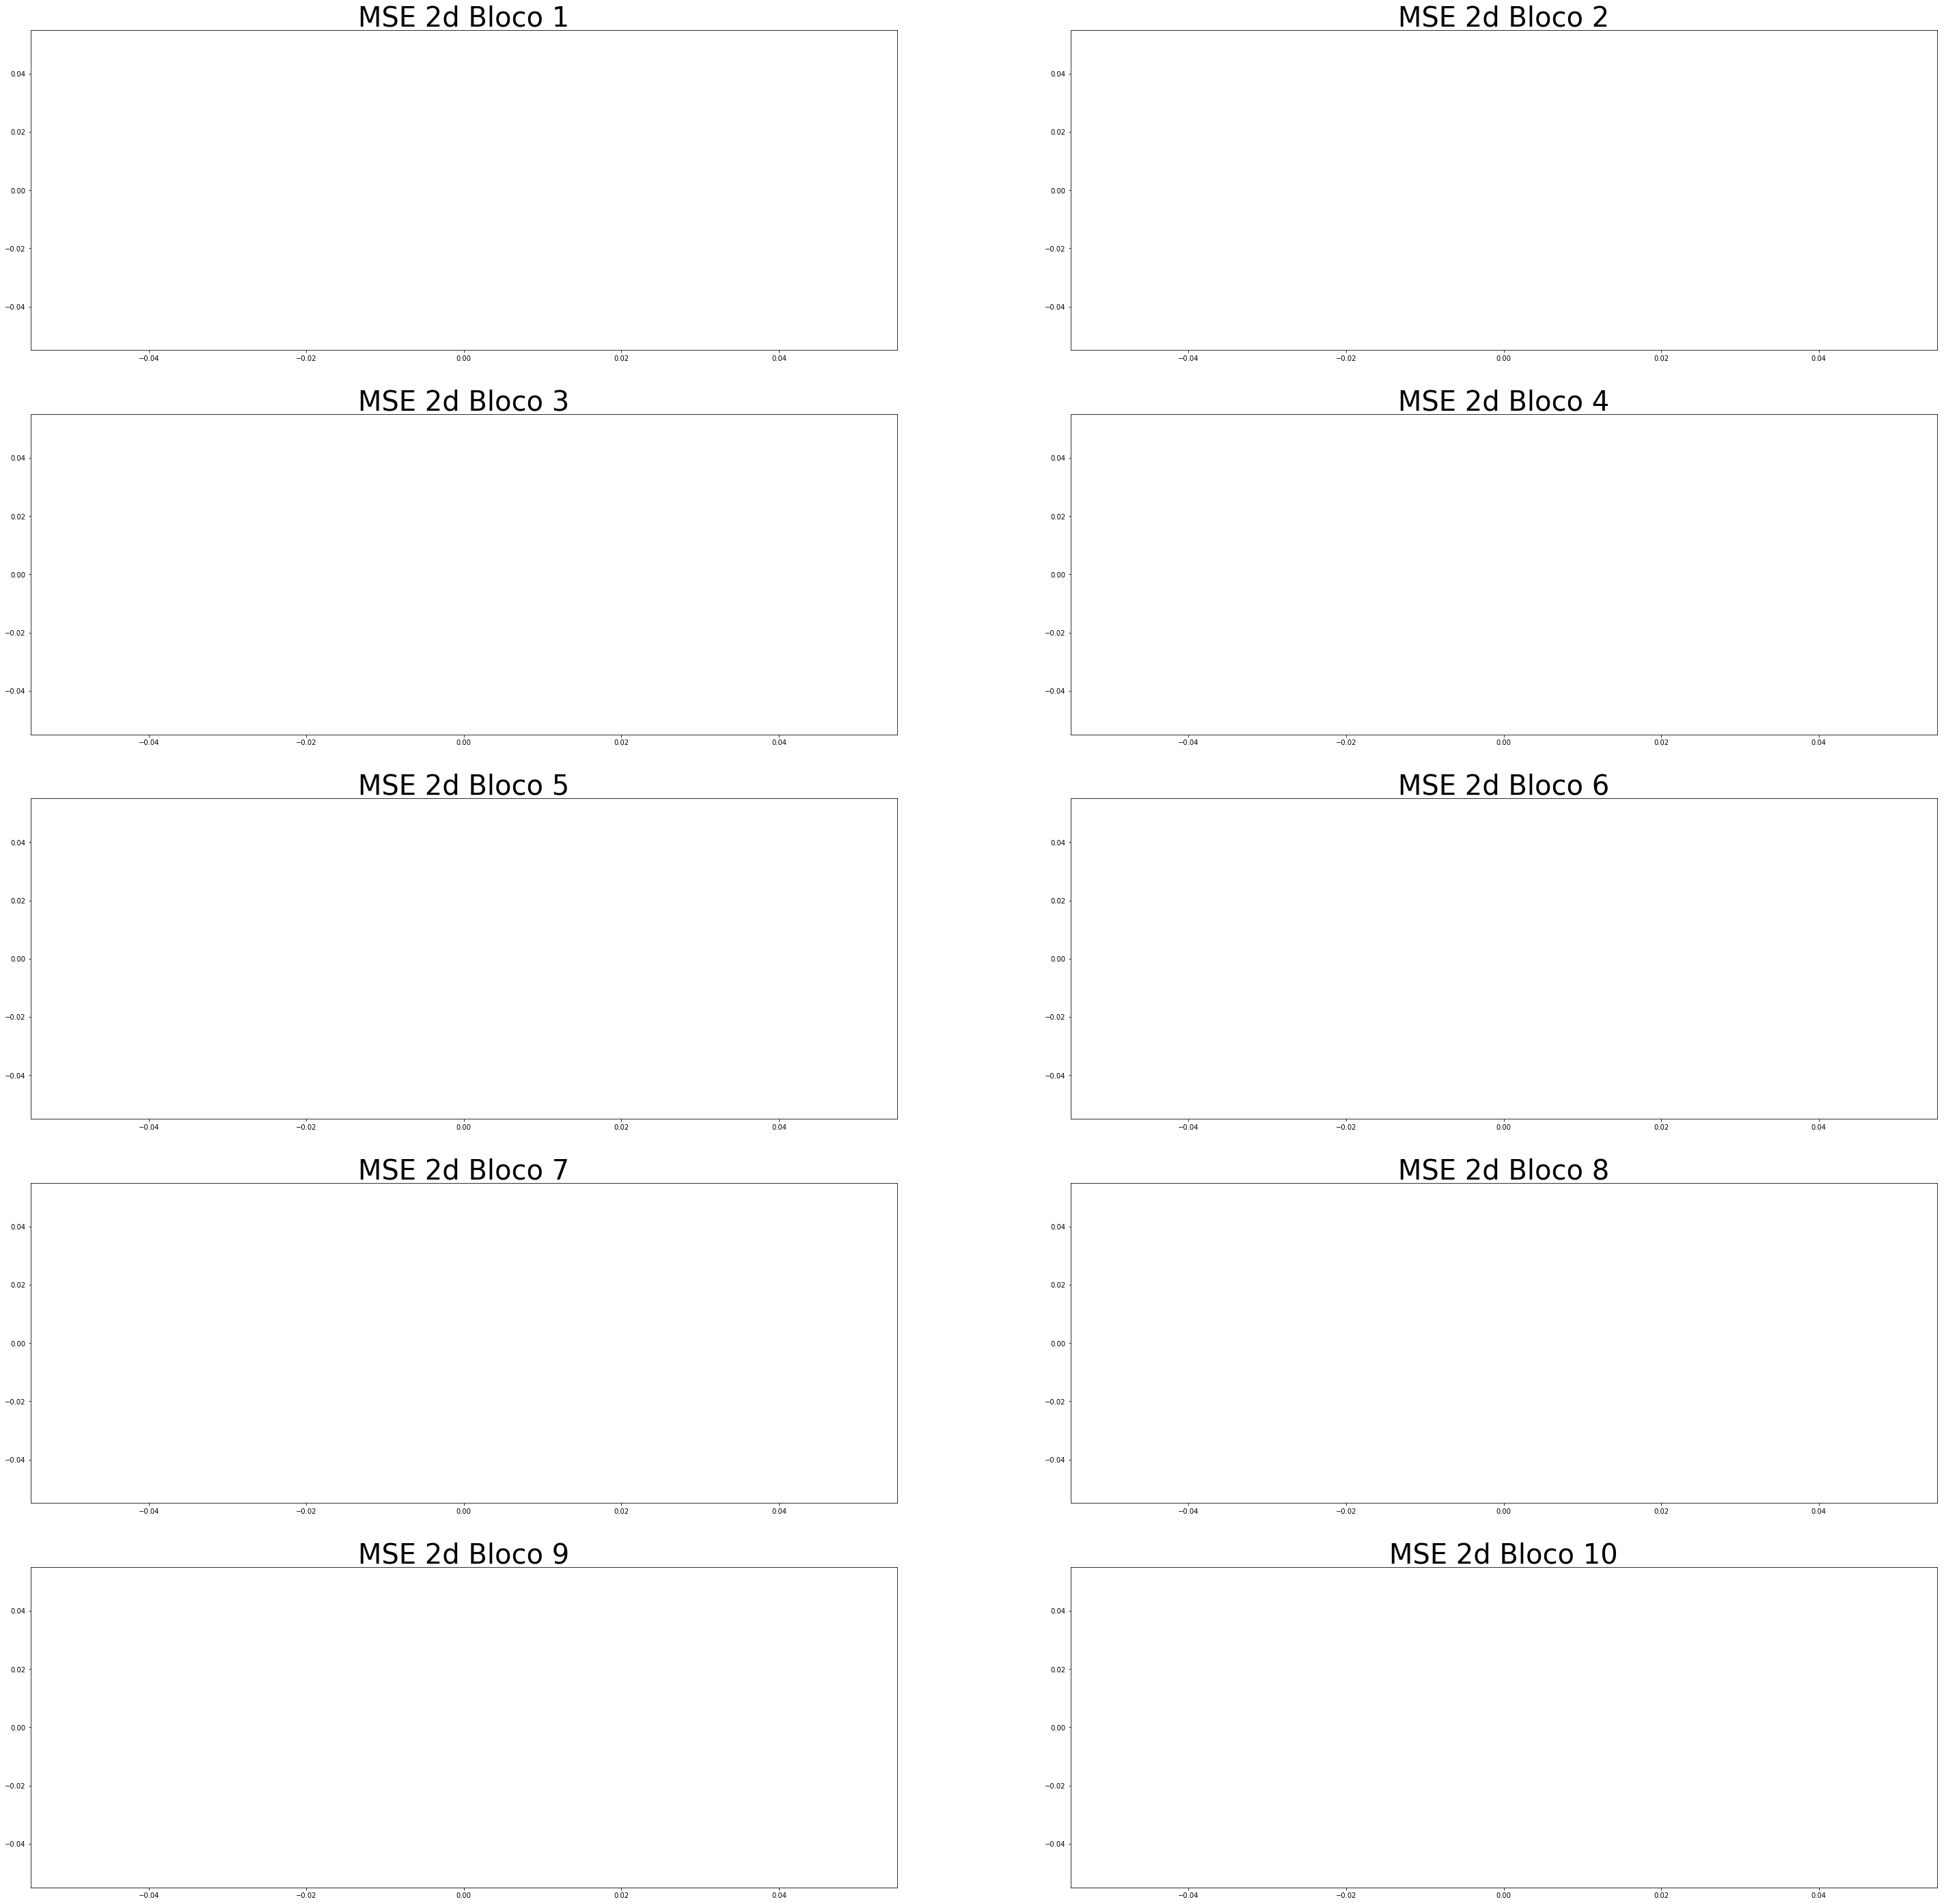

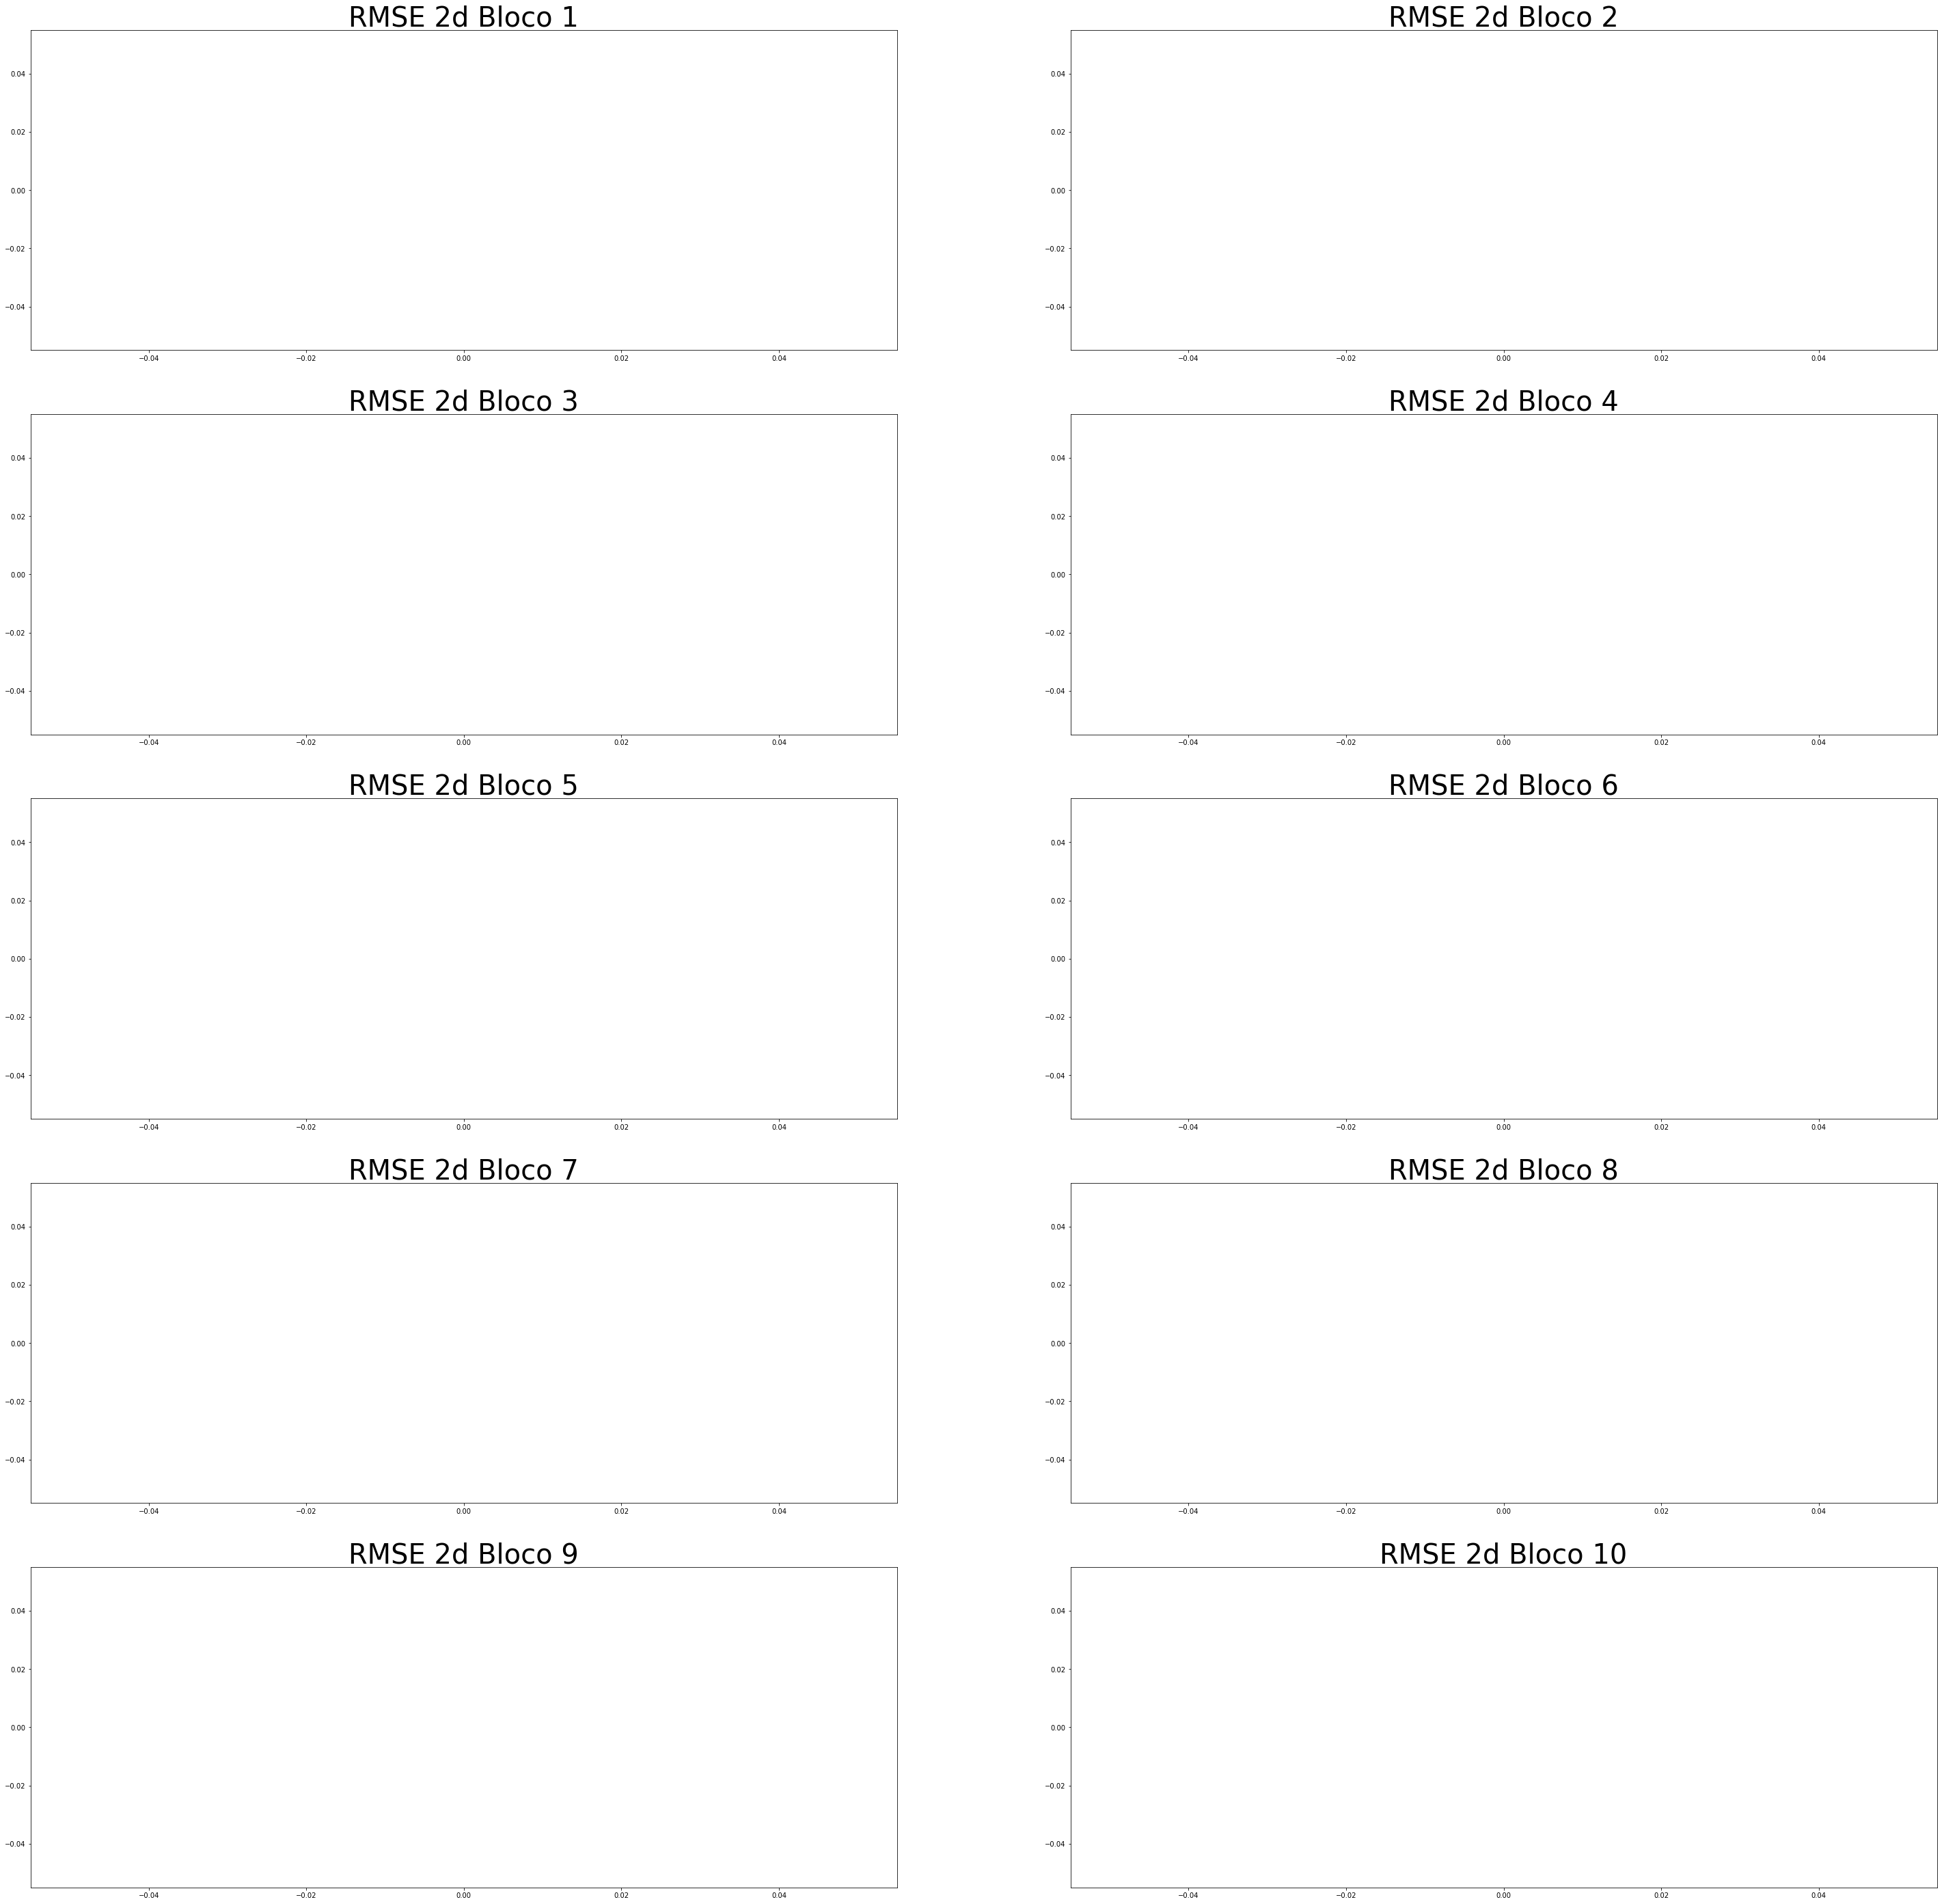

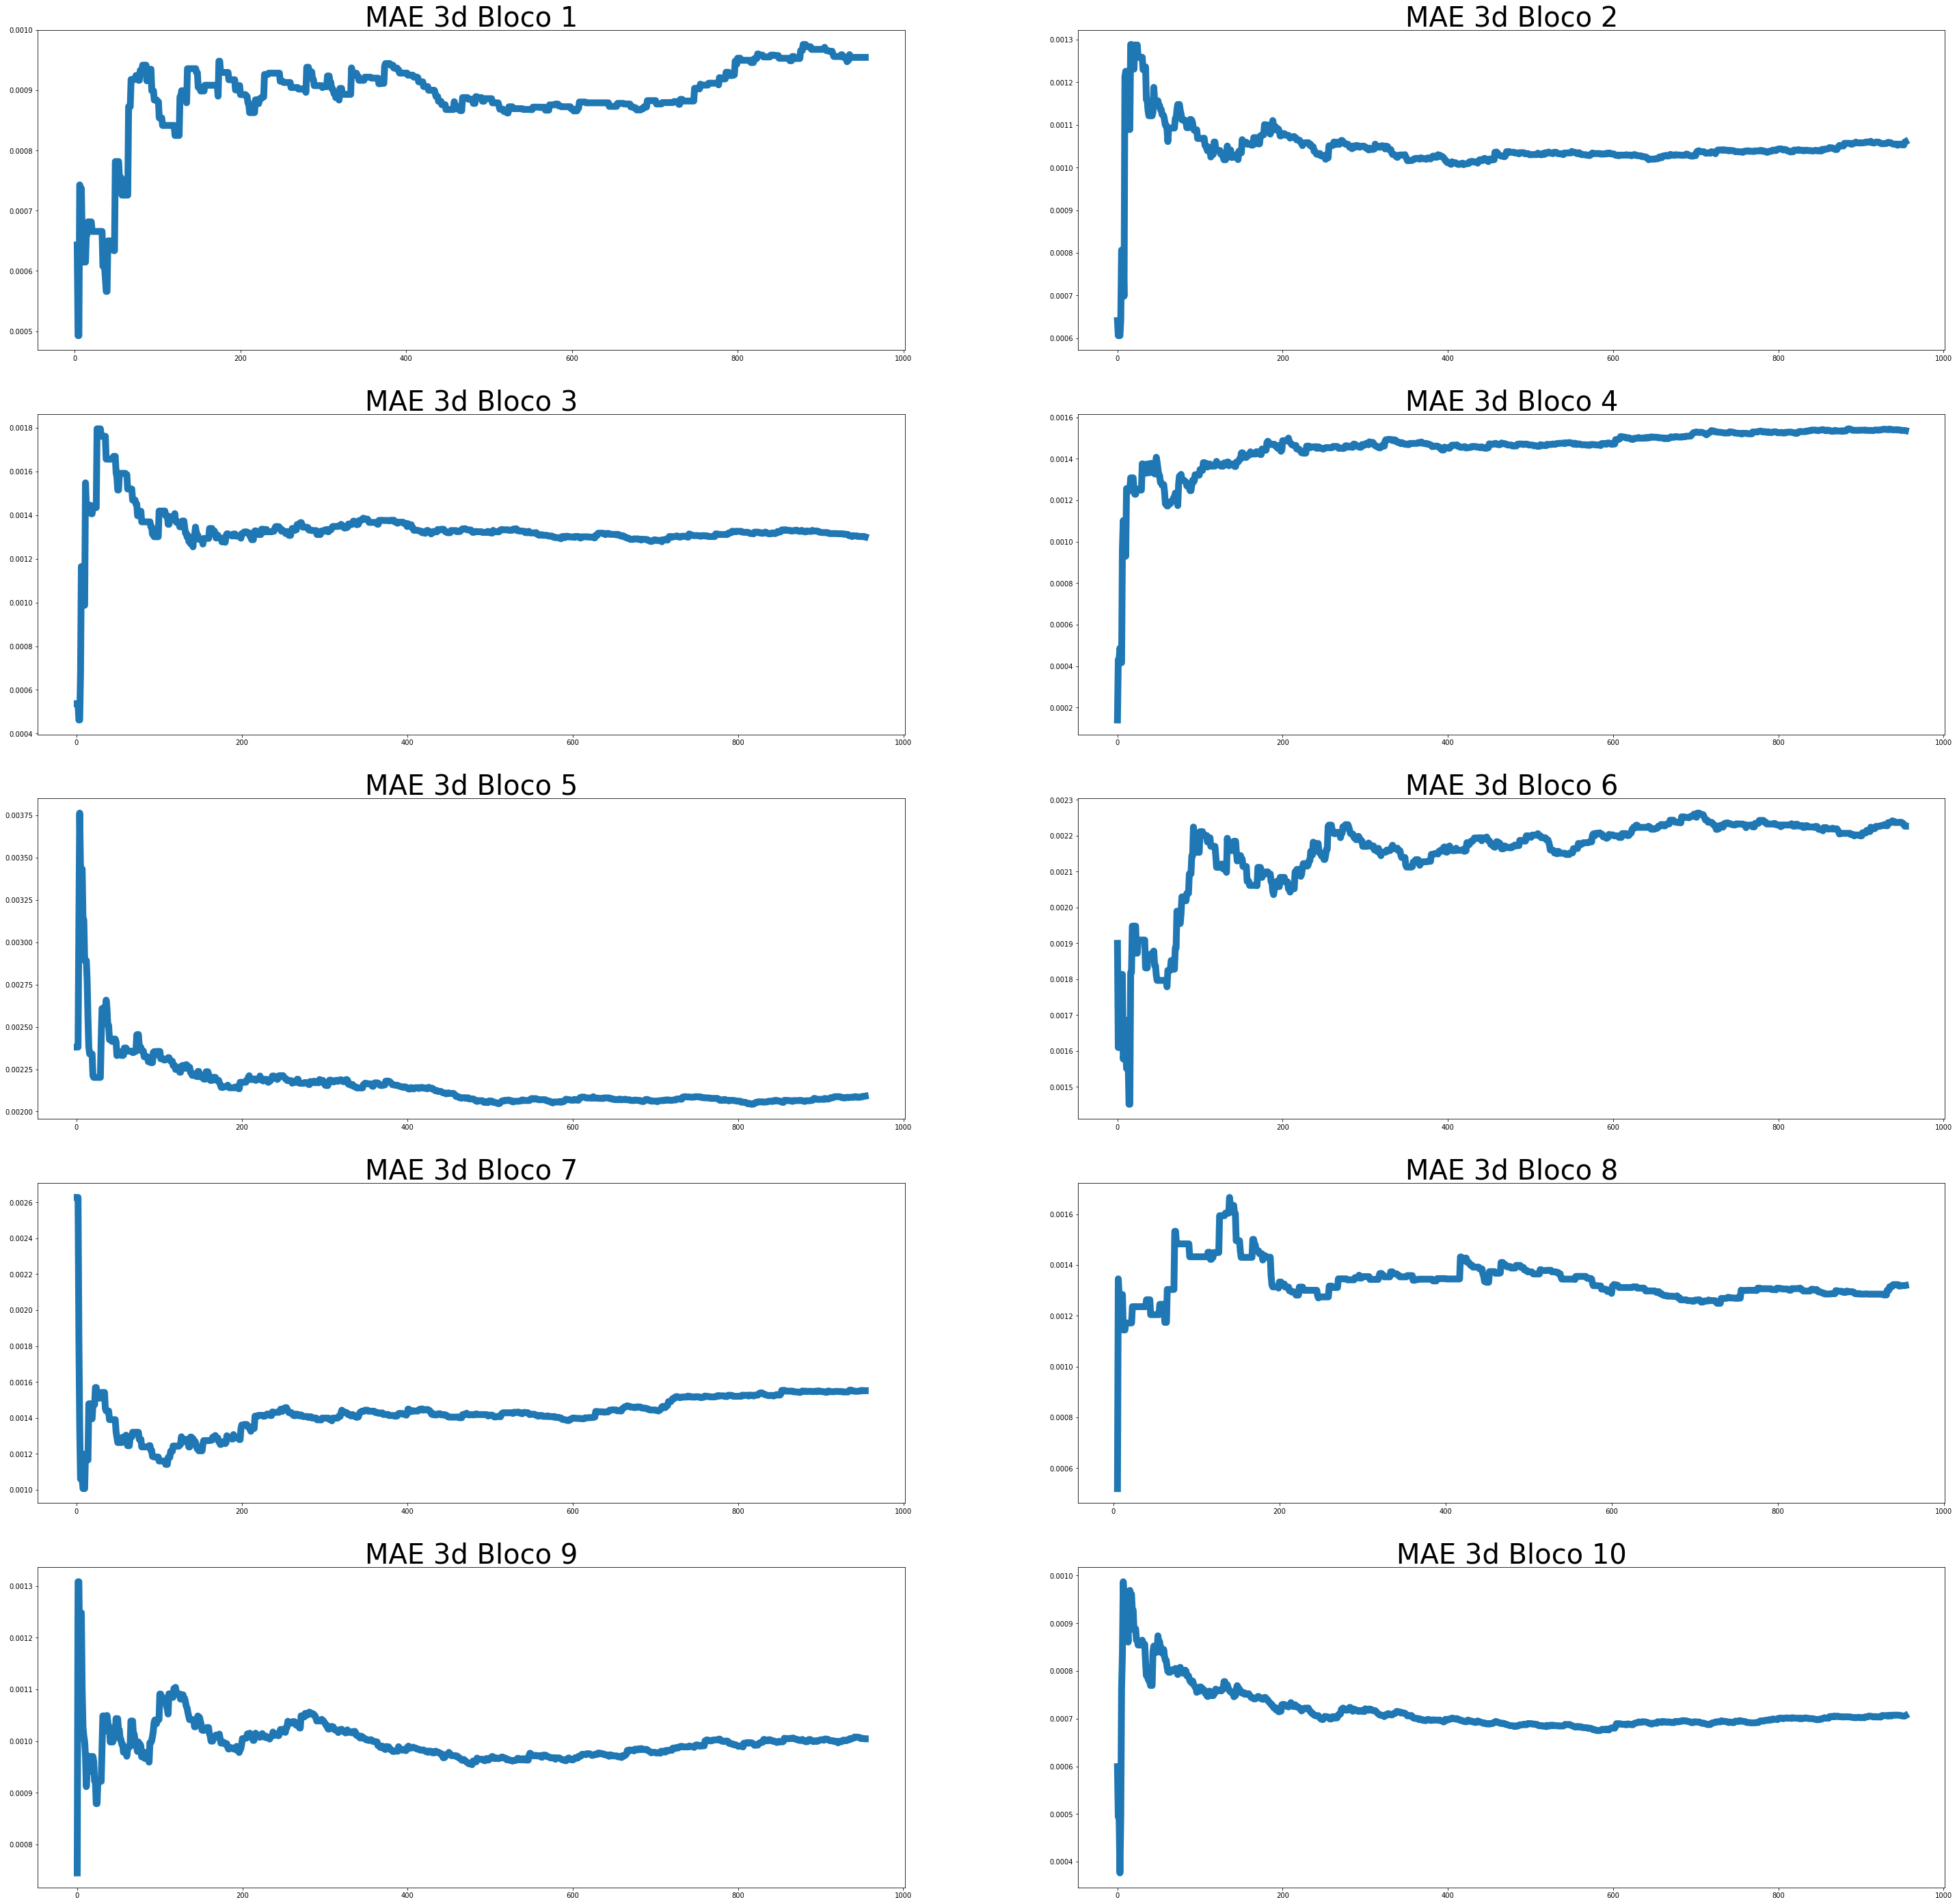

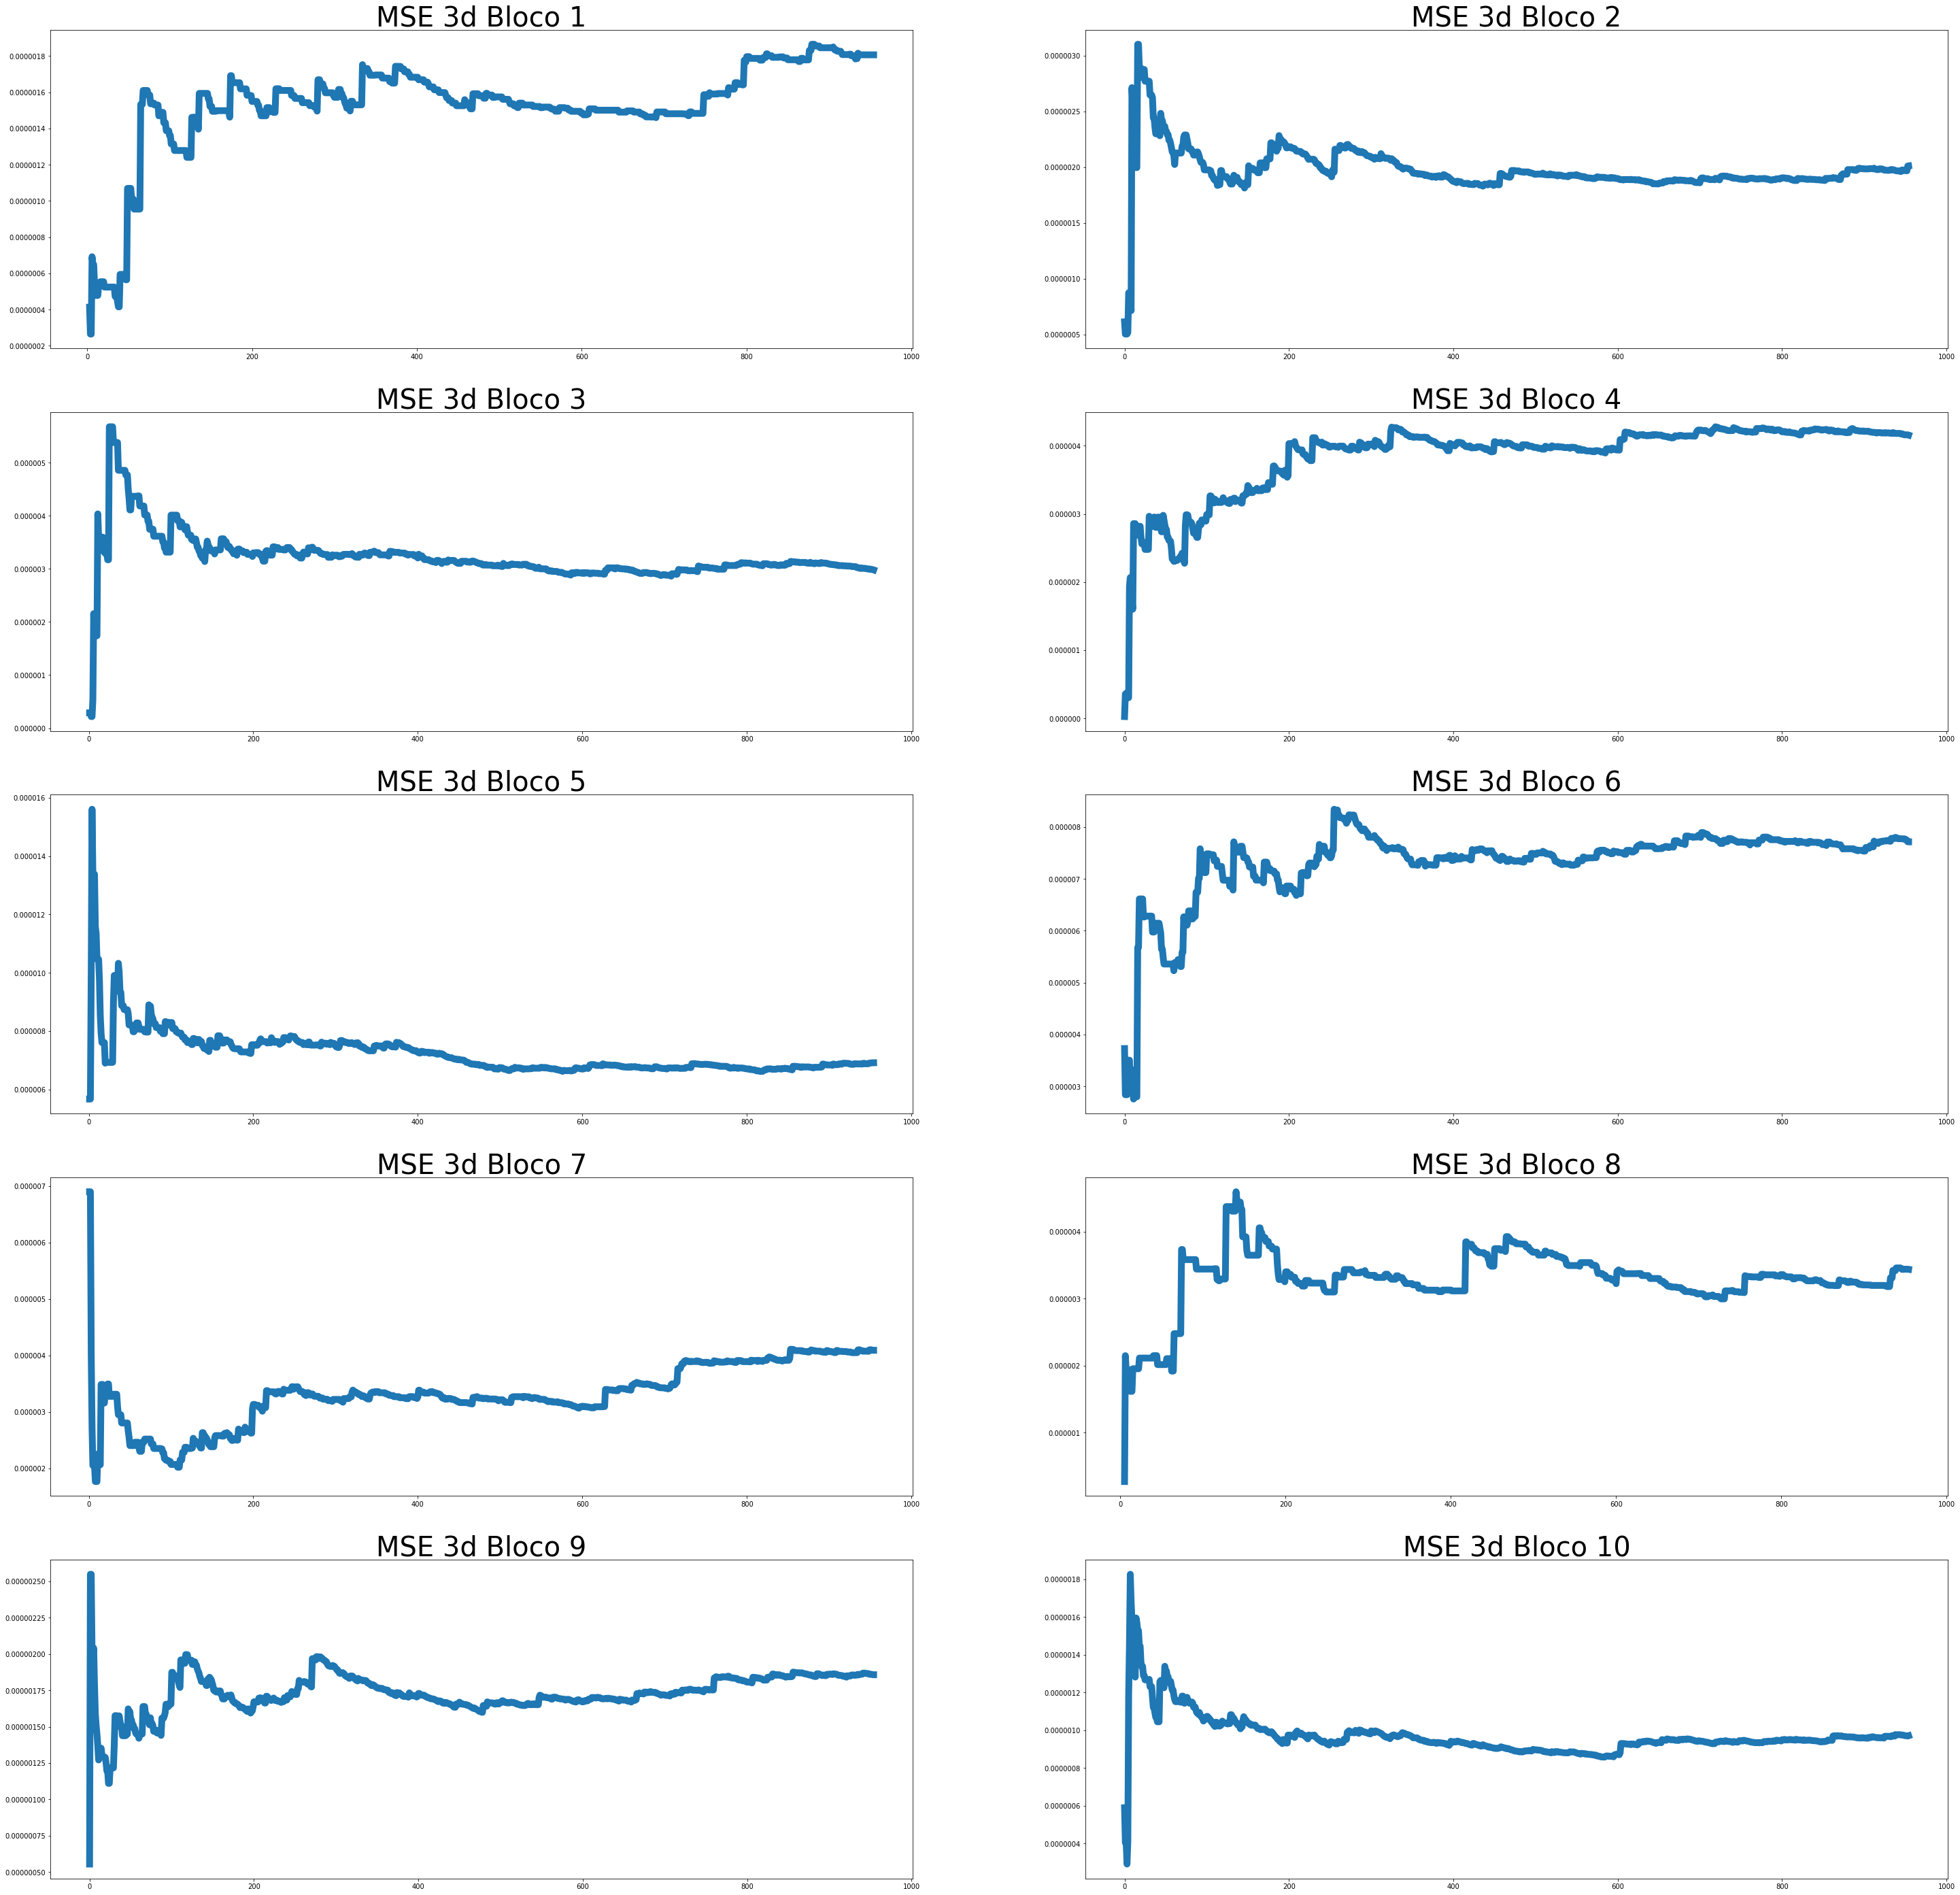

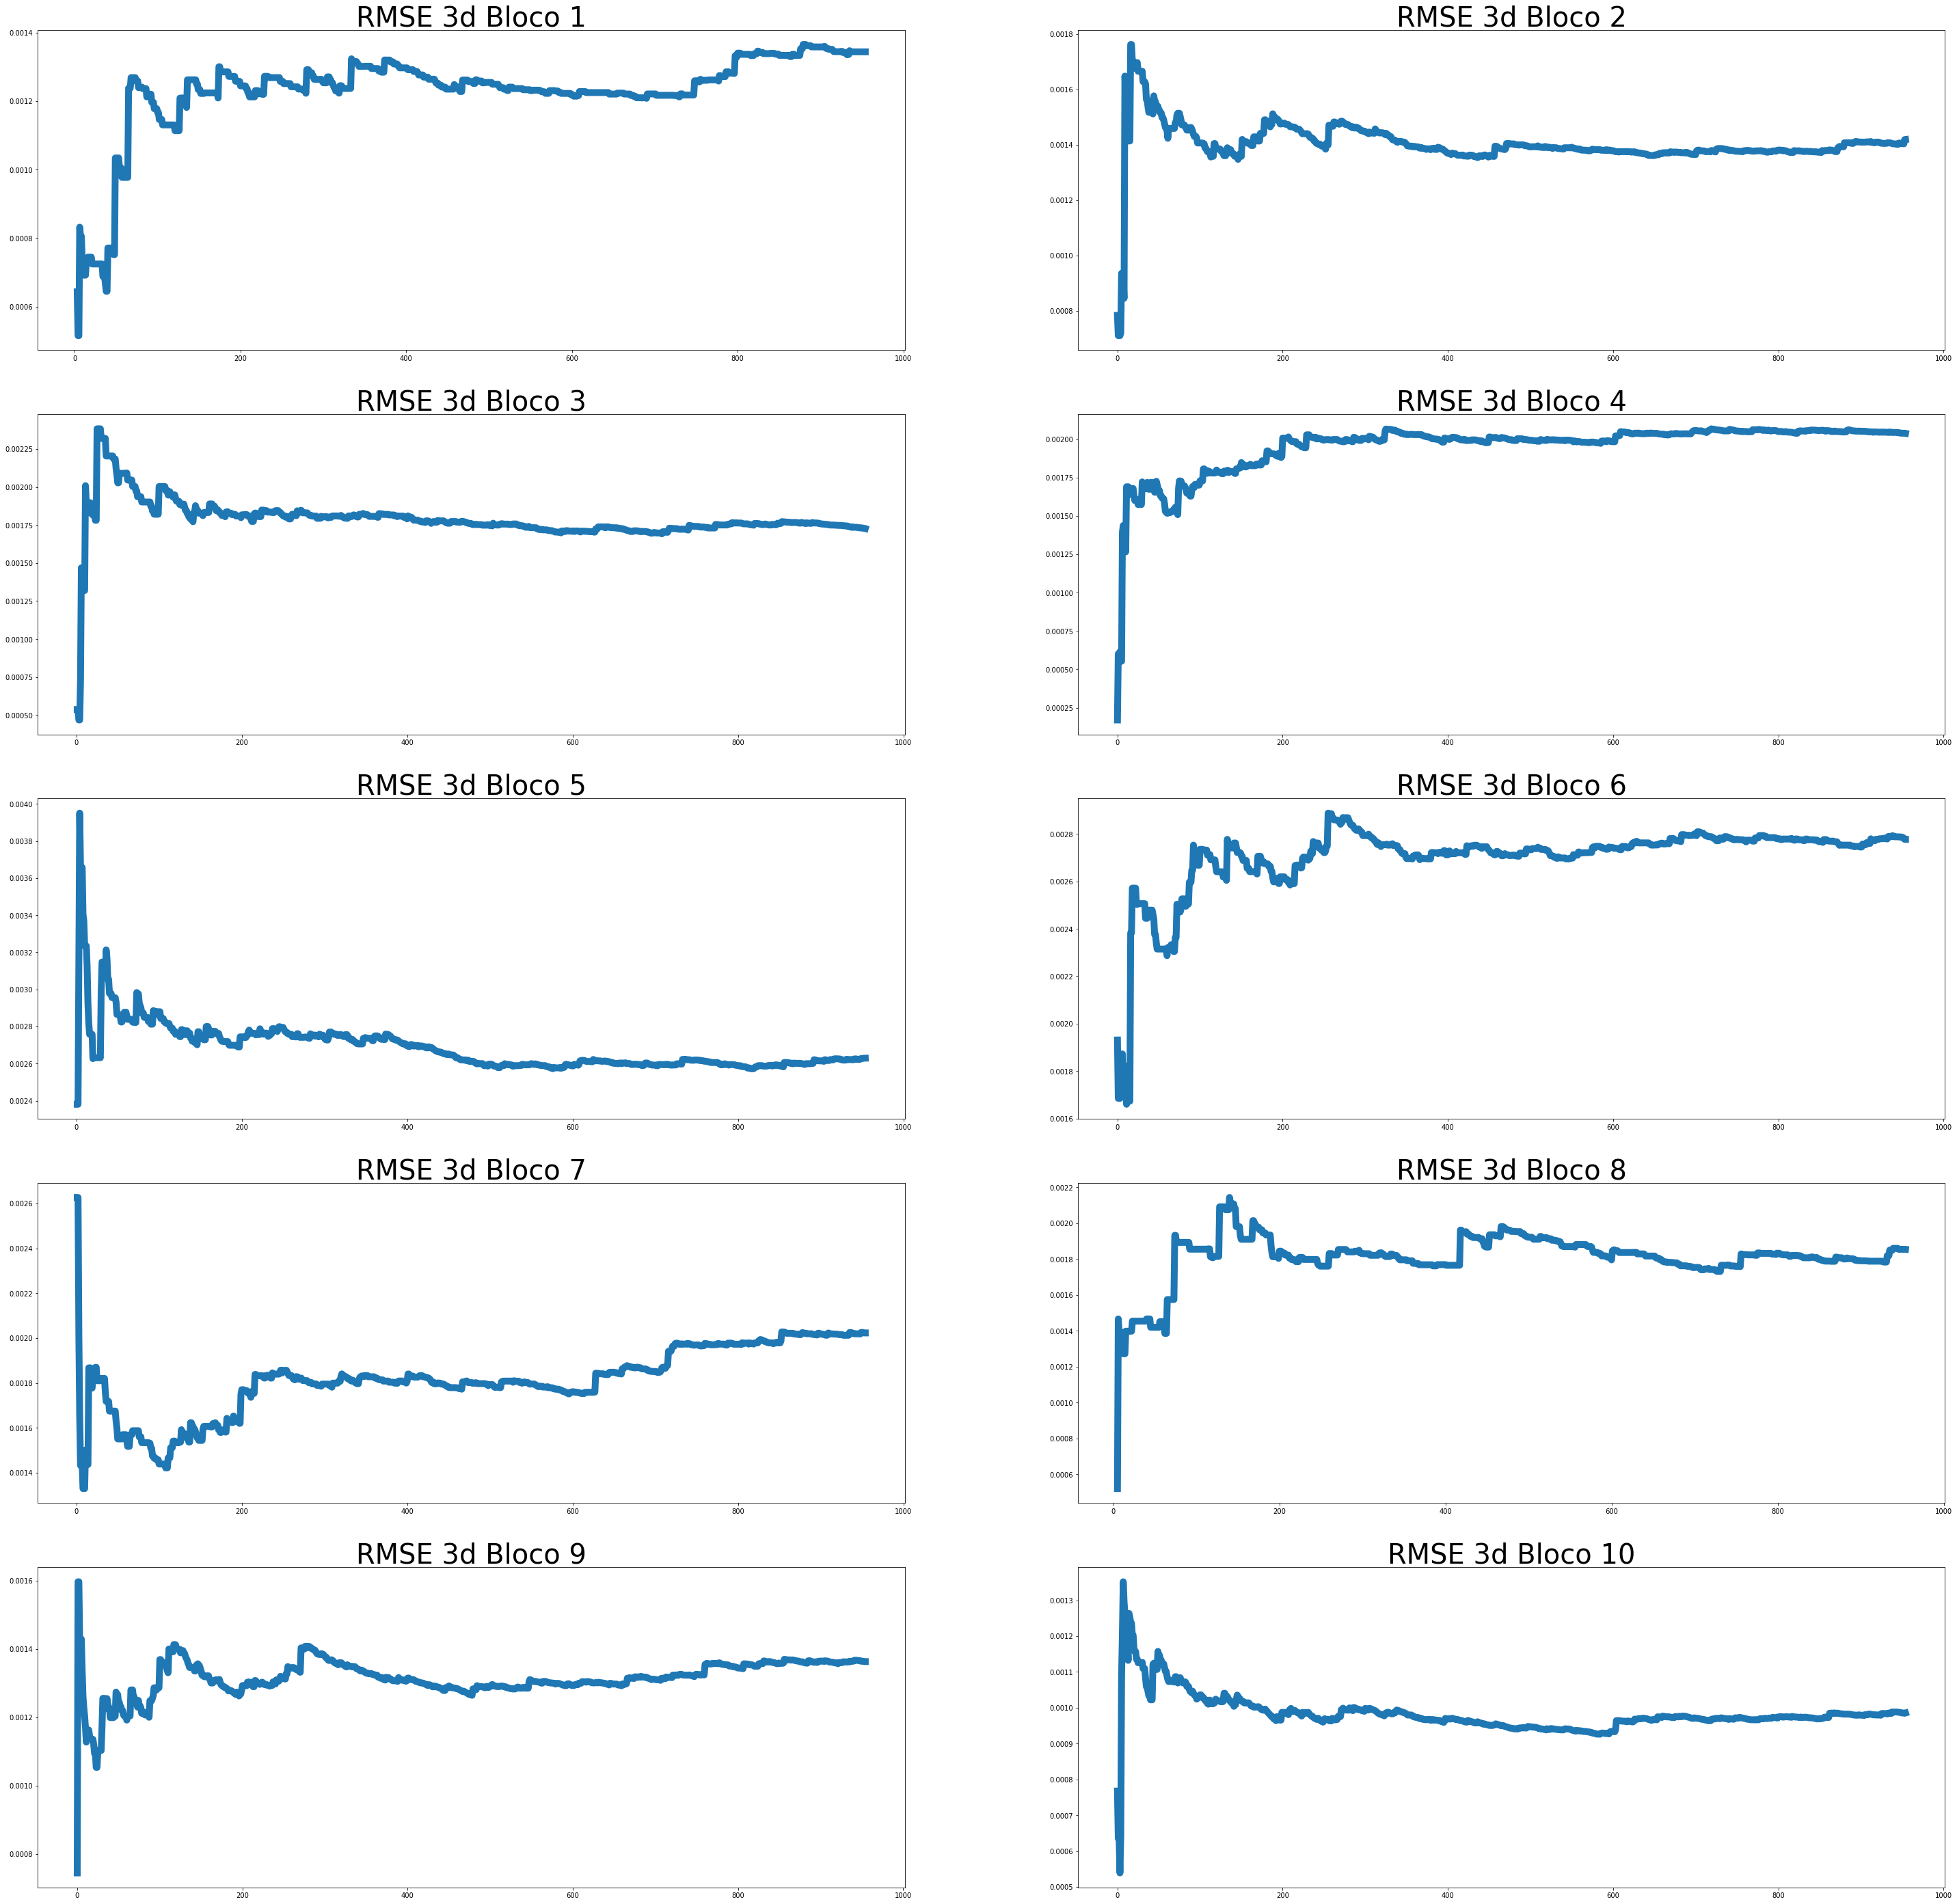

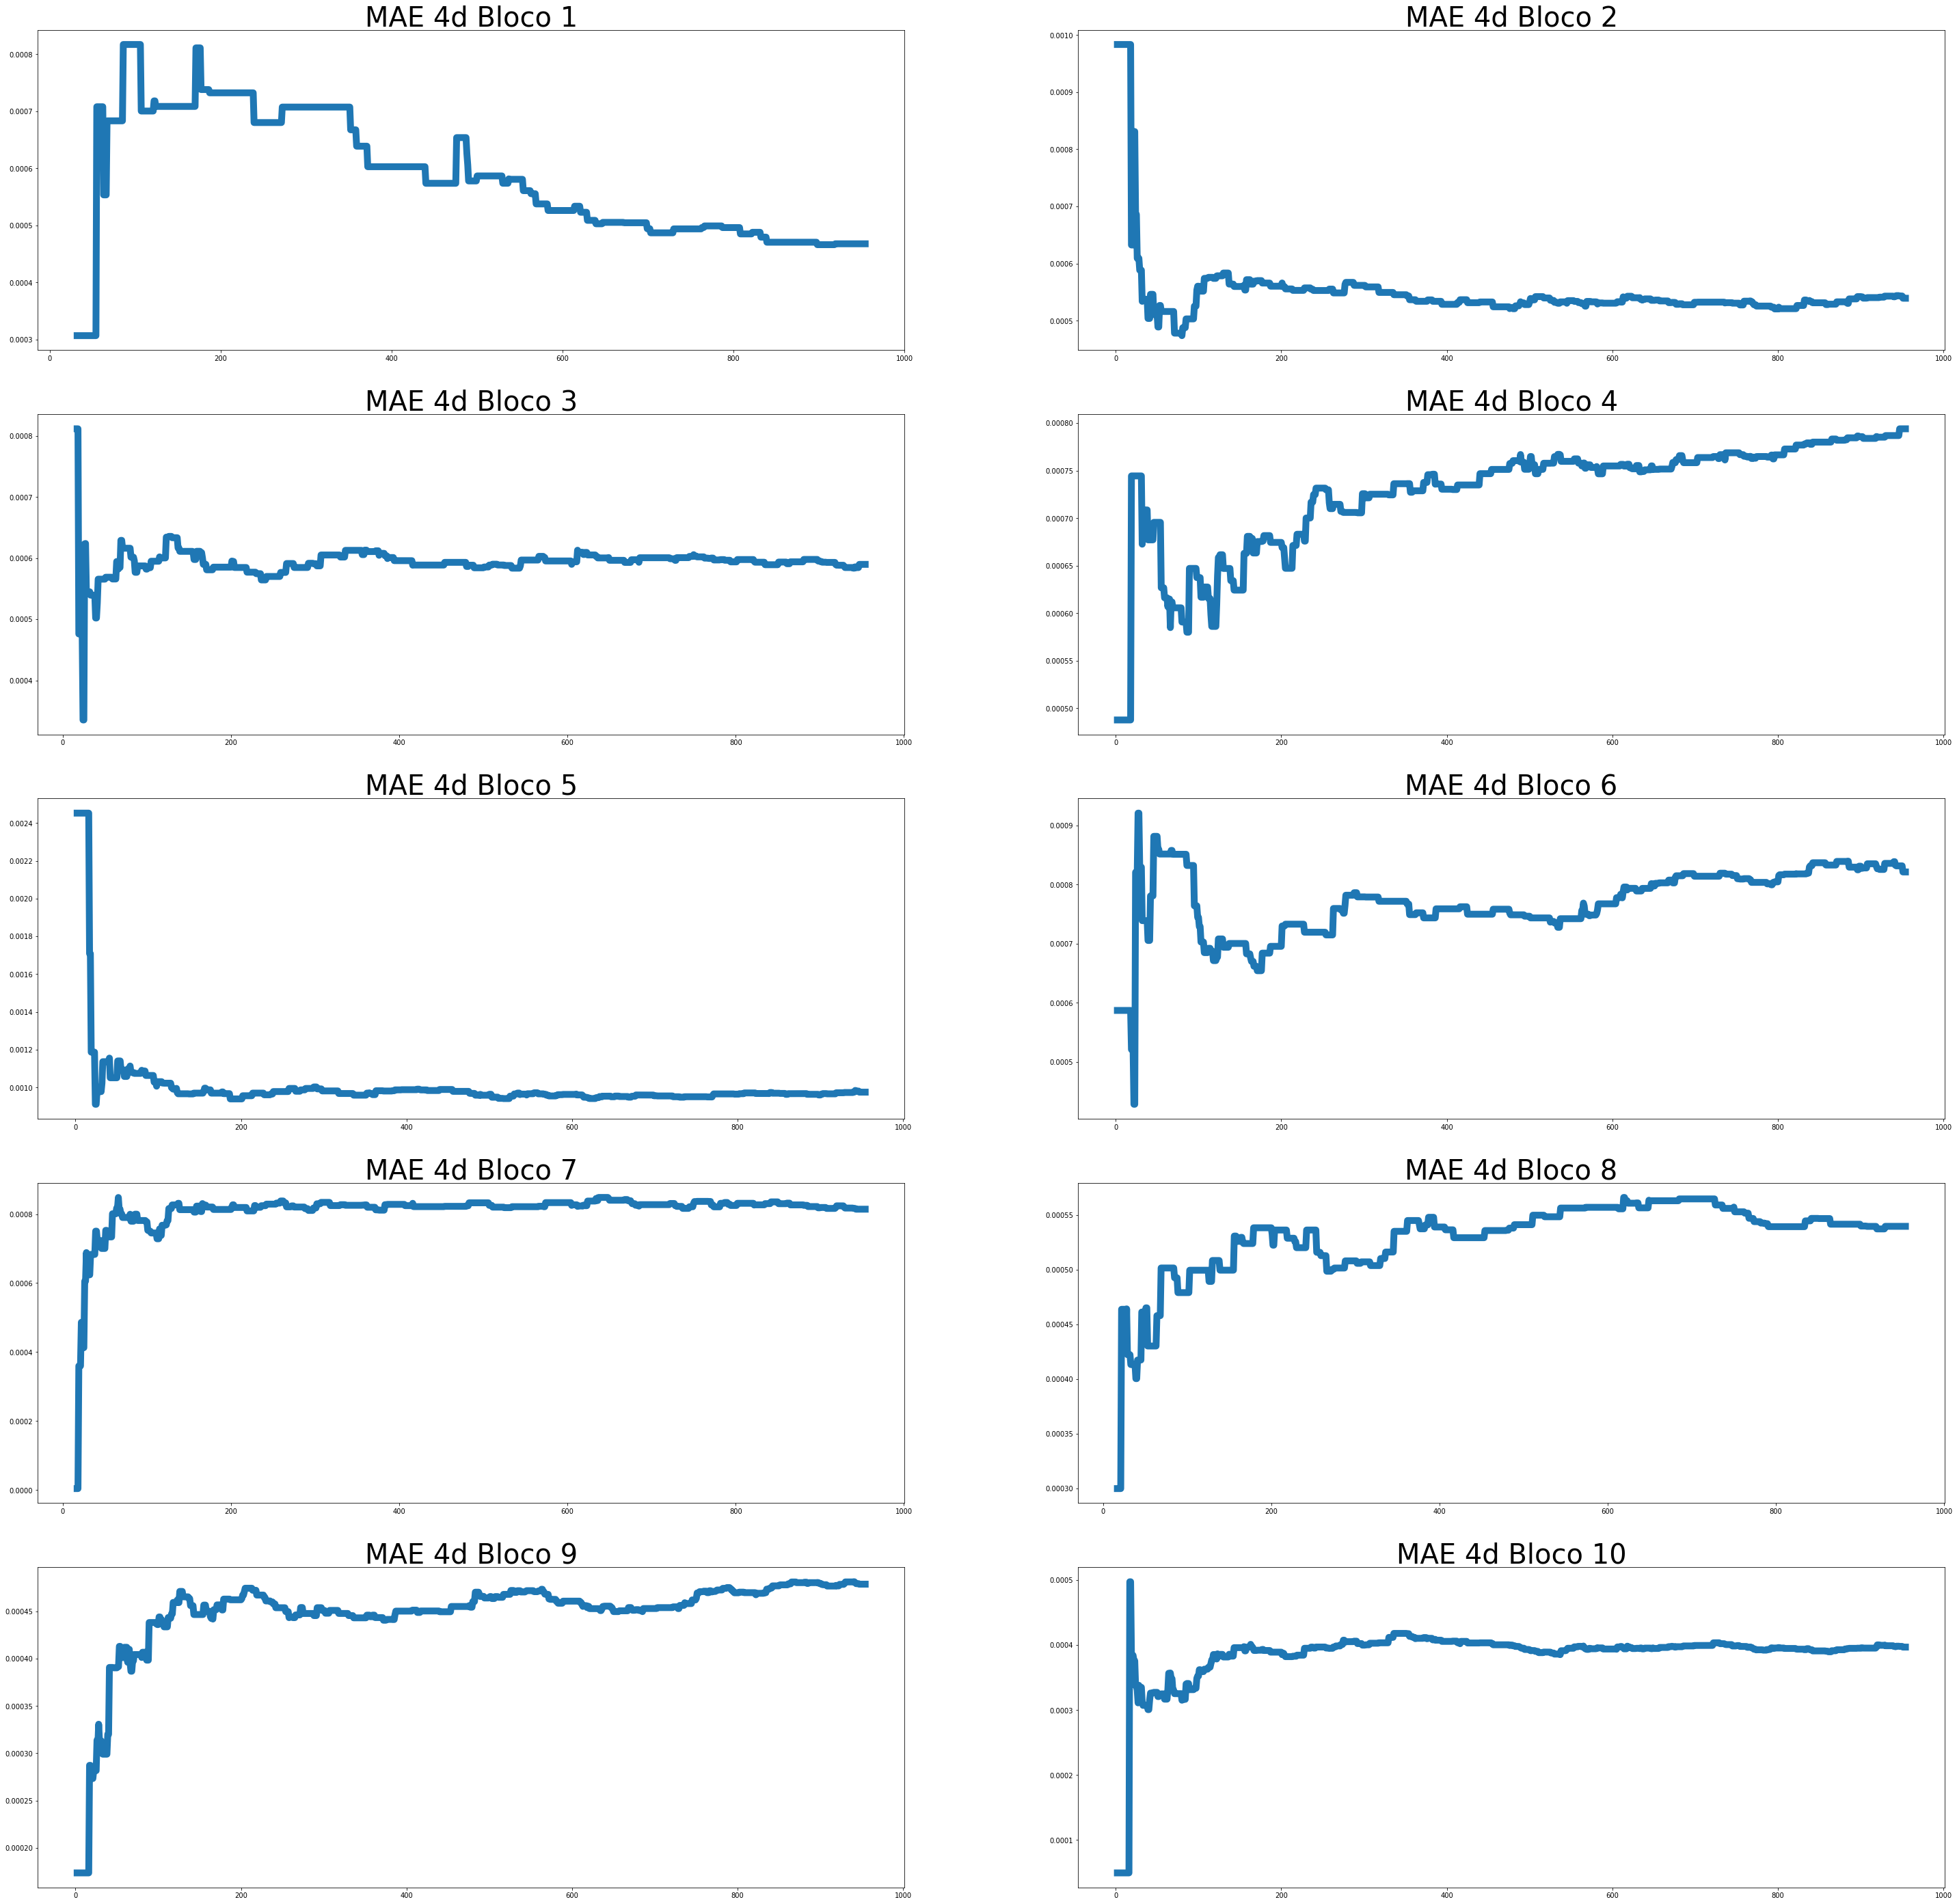

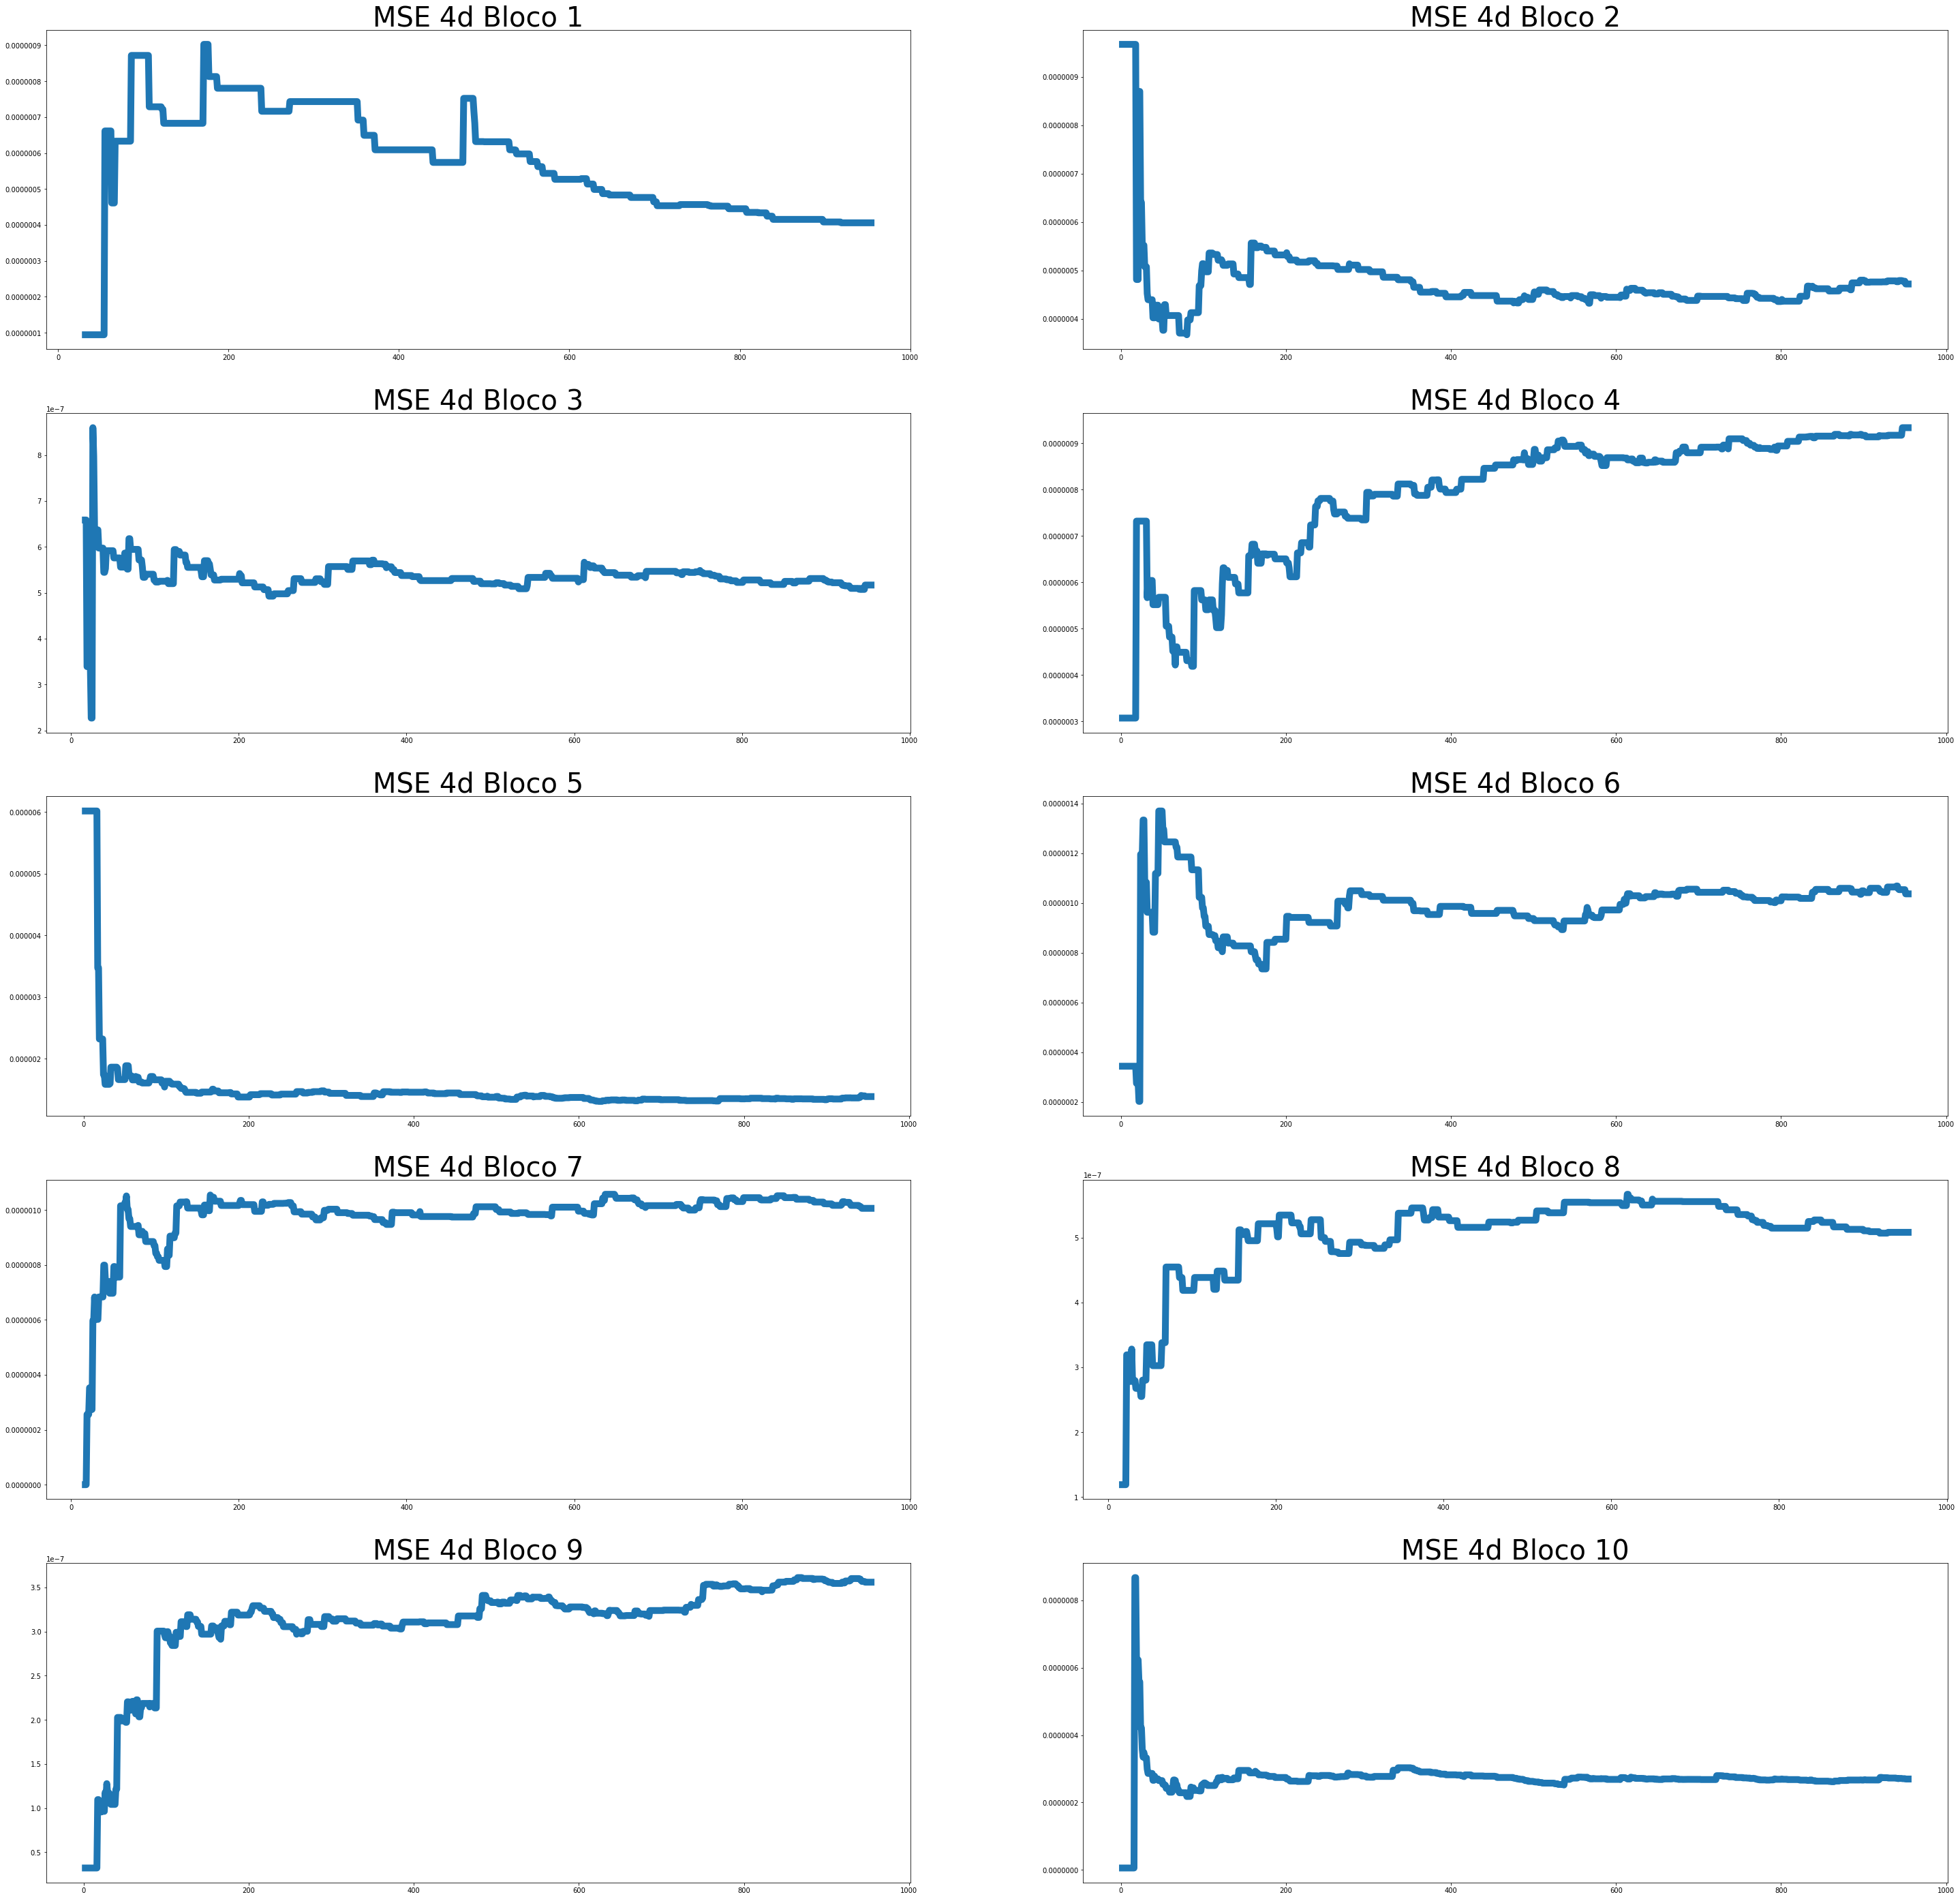

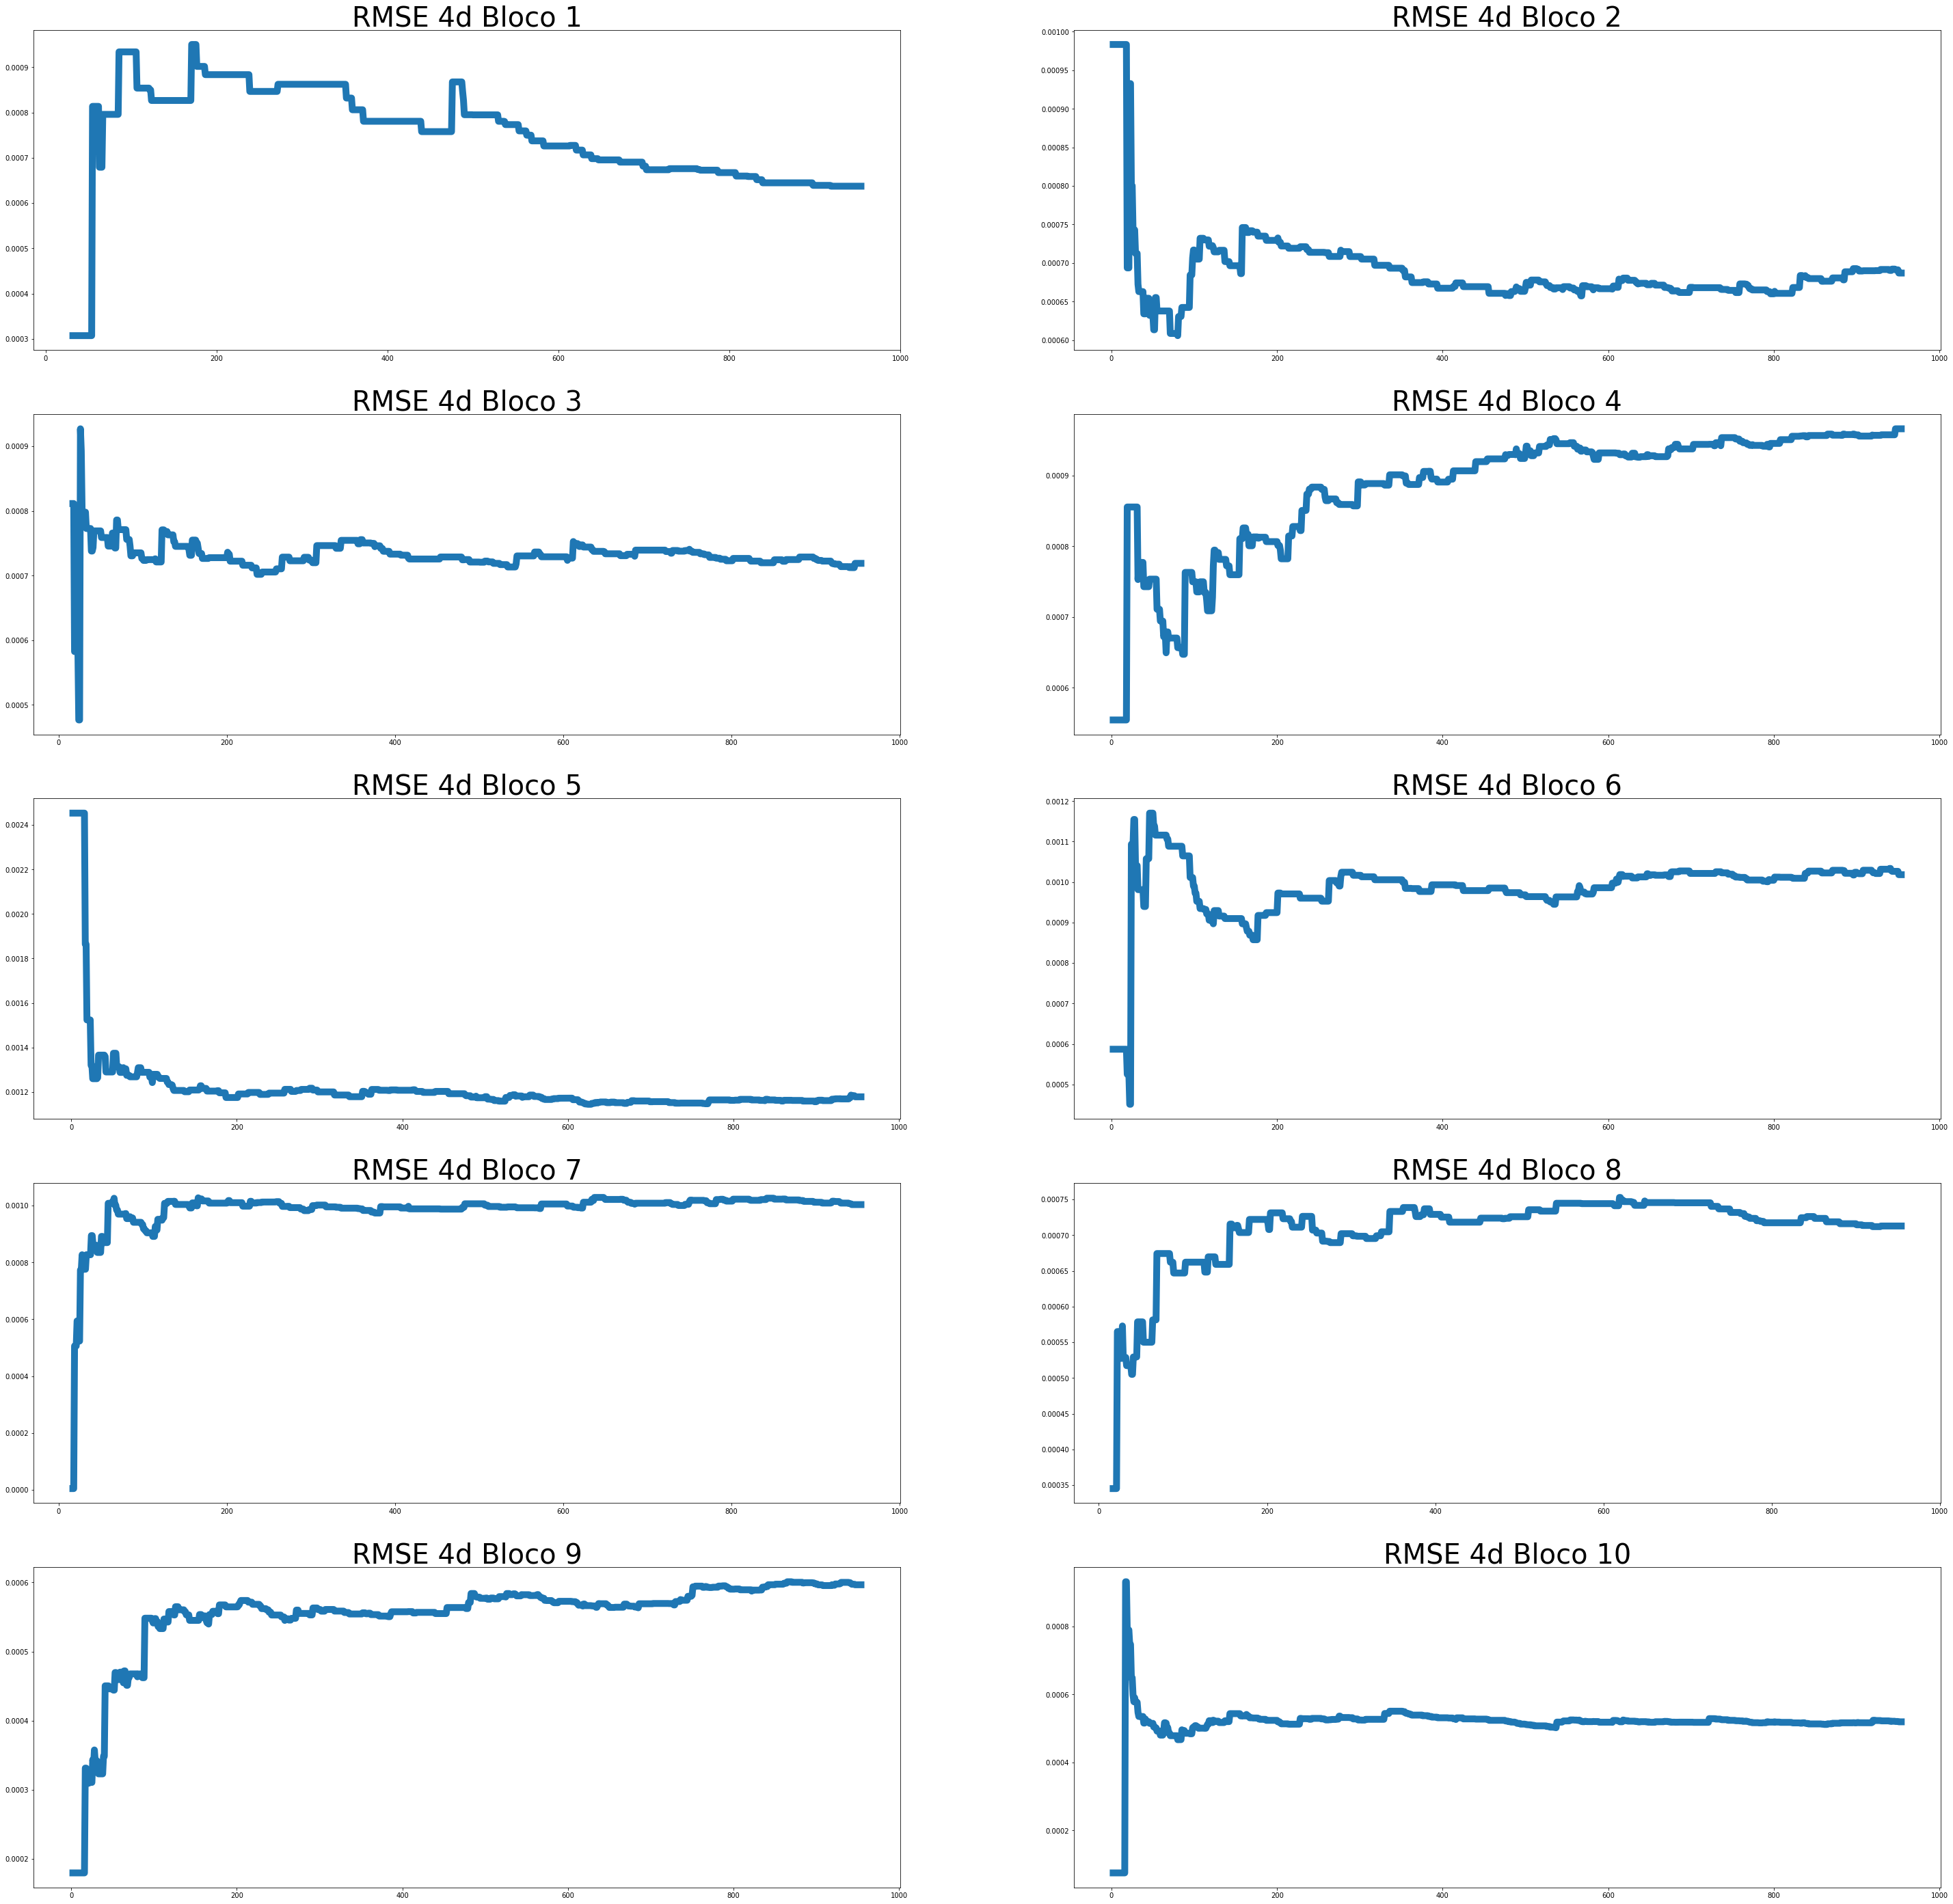

In [12]:
t=np.arange(len(MAE))


fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MAE Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MAEc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MSE Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MSEc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('RMSE Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, RMSEc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MAE 2d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MAE2Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MSE 2d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MSE2Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('RMSE 2d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, RMSE2Dc[:,i],linewidth=10)
plt.show()


fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MAE 3d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MAE3Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MSE 3d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MSE3Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('RMSE 3d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, RMSE3Dc[:,i],linewidth=10)
plt.show()


fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MAE 4d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MAE4Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MSE 4d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MSE4Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('RMSE 4d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, RMSE4Dc[:,i],linewidth=10)
plt.show()

ERROS DOS 10 PRIMEIROS TERMOS, POR BLOCOS 



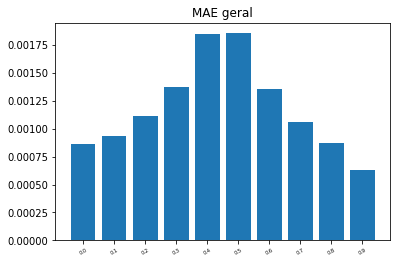

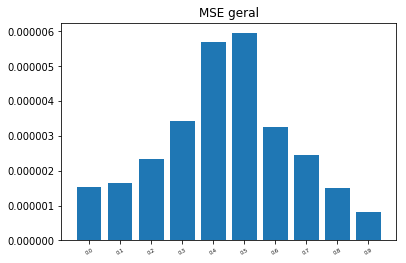

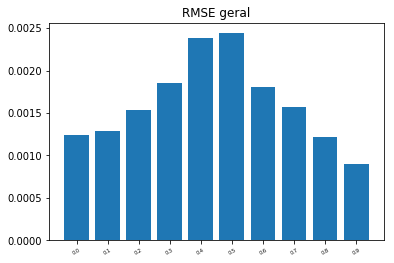


 
 ERROS PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA SEGUNDA CASA DECIMAL 



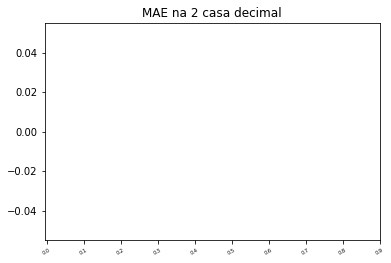

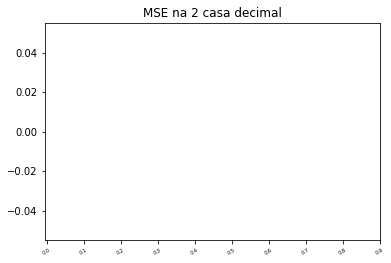

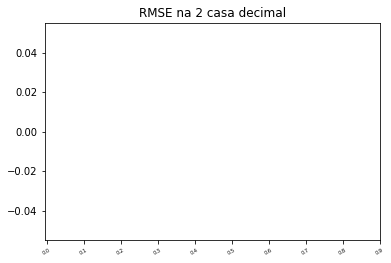


 
 ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA TERCEIRA CASA DECIMAL 



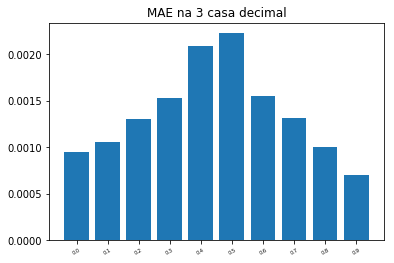

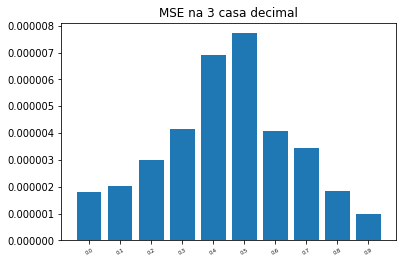

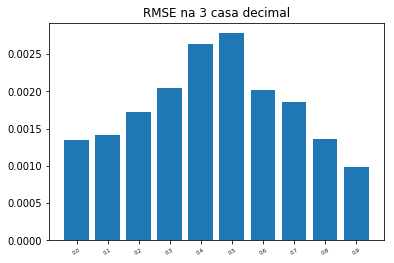


 
 ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA QUARTA CASA DECIMAL 



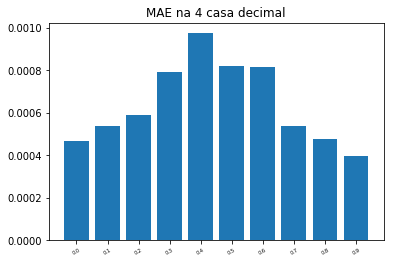

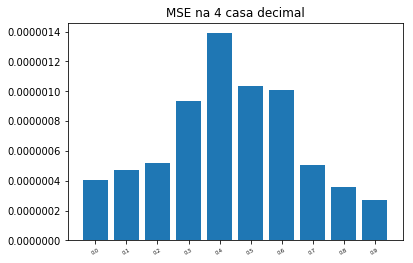

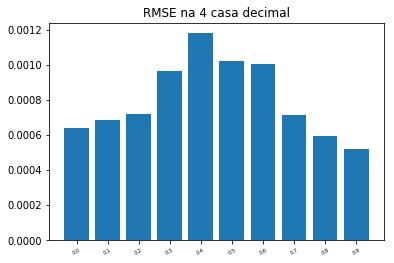

In [13]:
#------ ERROS GERAIS, DE CADA BLOCO

print('ERROS DOS 10 PRIMEIROS TERMOS, POR BLOCOS \n')



label = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]


index = np.arange(len(MAE[-1]))
plt.bar(index, MAE[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE geral')
plt.show()

index = np.arange(len(MSE[-1]))
plt.bar(index, MSE[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE geral')
plt.show()



index = np.arange(len(RMSE[-1]))
plt.bar(index, RMSE[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE geral')
plt.show()

#------ ERROS PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA SEGUNDA CASA DECIMAL
print('\n \n ERROS PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA SEGUNDA CASA DECIMAL \n')


index = np.arange(len(MAE2D[-1]))
plt.bar(index, MAE2D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE na 2 casa decimal')
plt.show()

index = np.arange(len(MSE2D[-1]))
plt.bar(index, MSE2D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE na 2 casa decimal')
plt.show()


index = np.arange(len(RMSE[-1]))
plt.bar(index, RMSE2D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE na 2 casa decimal')
plt.show()
    
#------ ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA TERCEIRA CASA DECIMAL
print('\n \n ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA TERCEIRA CASA DECIMAL \n')

index = np.arange(len(MAE3D[-1]))
plt.bar(index, MAE3D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE na 3 casa decimal')
plt.show()



index = np.arange(len(MSE3D[-1]))
plt.bar(index, MSE3D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE na 3 casa decimal')
plt.show()



index = np.arange(len(RMSE3D[-1]))
plt.bar(index, RMSE3D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE na 3 casa decimal')
plt.show()
  
    
#------ ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA QUARTA CASA DECIMAL
print('\n \n ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA QUARTA CASA DECIMAL \n')



index = np.arange(len(MAE4D[-1]))
plt.bar(index, MAE4D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE na 4 casa decimal')
plt.show()


index = np.arange(len(MSE4D[-1]))
plt.bar(index, MSE4D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE na 4 casa decimal')
plt.show()


index = np.arange(len(RMSE4D[-1]))
plt.bar(index, RMSE4D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE na 4 casa decimal')
plt.show()


In [14]:
#------ ERROS GERAIS, DE CADA BLOCO

print('ERROS DOS 10 PRIMEIROS TERMOS, POR BLOCOS \n')



label = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]


index = np.arange(len(MAE[3000]))
plt.bar(index, MAE[3000])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE geral')
plt.show()

index = np.arange(len(MSE[3000]))
plt.bar(index, MSE[3000])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE geral')
plt.show()



index = np.arange(len(RMSE[3000]))
plt.bar(index, RMSE[3000])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE geral')
plt.show()

#------ ERROS PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA SEGUNDA CASA DECIMAL
print('\n \n ERROS PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA SEGUNDA CASA DECIMAL \n')


index = np.arange(len(MAE2D[3000]))
plt.bar(index, MAE2D[3000])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE na 2 casa decimal')
plt.show()

index = np.arange(len(MSE2D[3000]))
plt.bar(index, MSE2D[3000])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE na 2 casa decimal')
plt.show()


index = np.arange(len(RMSE[3000]))
plt.bar(index, RMSE2D[3000])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE na 2 casa decimal')
plt.show()
    
#------ ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA TERCEIRA CASA DECIMAL
print('\n \n ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA TERCEIRA CASA DECIMAL \n')

index = np.arange(len(MAE3D[3000]))
plt.bar(index, MAE3D[3000])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE na 3 casa decimal')
plt.show()



index = np.arange(len(MSE3D[3000]))
plt.bar(index, MSE3D[3000])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE na 3 casa decimal')
plt.show()



index = np.arange(len(RMSE3D[3000]))
plt.bar(index, RMSE3D[3000])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE na 3 casa decimal')
plt.show()
  
    
#------ ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA QUARTA CASA DECIMAL
print('\n \n ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA QUARTA CASA DECIMAL \n')



index = np.arange(len(MAE4D[3000]))
plt.bar(index, MAE4D[3000])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE na 4 casa decimal')
plt.show()


index = np.arange(len(MSE4D[3000]))
plt.bar(index, MSE4D[3000])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE na 4 casa decimal')
plt.show()


index = np.arange(len(RMSE4D[3000]))
plt.bar(index, RMSE4D[3000])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE na 4 casa decimal')
plt.show()


ERROS DOS 10 PRIMEIROS TERMOS, POR BLOCOS 



IndexError: list index out of range